Import all the things

In [1]:
from __future__ import print_function
import os
import sys
import tqdm
import math
import multiprocessing as mp
from timeit import default_timer as timer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import namedtuple

Define the functions 

In [36]:
# A Graph is a namedtuple of matrices (X, Ri, Ro, y)

Graph = namedtuple('Graph', ['X', 'Ri', 'Ro', 'y'])

# define funcs 
def graph_to_sparse(graph):
    Ri_rows, Ri_cols = graph.Ri.nonzero()
    Ro_rows, Ro_cols = graph.Ro.nonzero()
    return dict(X=graph.X, y=graph.y,
                Ri_rows=Ri_rows, Ri_cols=Ri_cols,
                Ro_rows=Ro_rows, Ro_cols=Ro_cols,
                simmatched=graph.simmatched
               )
def load_graph(filename, sparse =True):
    """Reade a single graph NPZ"""
    with np.load(filename) as f:
        if sparse:
            return sparse_to_graph(**dict(f.items()))
        else:
            return Graph(**dict(f.items()))
        
def draw_sample(X, Ri, Ro, y,
                cmap='bwr_r', 
                skip_false_edges=True): 
    # Select the i/o node features for each segment    
    feats_o = X[np.where(Ri.T)[1]]
    feats_i = X[np.where(Ro.T)[1]]   
    # Prepare the figure
    fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(20,10))
    cmap = plt.get_cmap(cmap)
        
    #Draw the hits which are stored as (r, phi, z)
    # first, r phi
    ax0.scatter(X[:,0], X[:,1], c='k')
    # second, x y
    ax1.scatter((X[:,0]*np.cos(math.pi*X[:,1])), (X[:,0]*np.sin(math.pi*X[:,1])), c='k')
    
    # Draw the segments
    t = tqdm.tqdm(range(y.shape[0]))
    for j in t:
        if y[j]:
            seg_args = dict(c='b', alpha=0.4)
        elif not skip_false_edges:
            seg_args = dict(c='black', alpha=0.4)
        else: continue     
        ax0.plot([feats_o[j,0], feats_i[j,0]], [feats_o[j,1], feats_i[j,1]], '-', **seg_args)
        ax1.plot([(feats_o[j,0]*np.cos(math.pi*feats_o[j,1])), (feats_i[j,0]*np.cos(math.pi*feats_i[j,1]))], 
                 [(feats_o[j,0]*np.sin(math.pi*feats_o[j,1])), (feats_i[j,0]*np.sin(math.pi*feats_i[j,1]))], 
                 '-', **seg_args)
        
    # Adjust axes
    ax0.set_xlabel('$r$')
    ax1.set_xlabel('$x$')
    ax0.set_ylabel('$\phi$')
    ax1.set_ylabel('$y$')
    plt.tight_layout()


#def sparse_to_graph(X, Ri_rows, Ri_cols, Ro_rows, Ro_cols, y, dtype=np.float32):
 #   n_nodes, n_edges = X.shape[0], Ri_rows.shape[0]
  #  spRi_idxs = np.stack([Ri_rows.astype(np.int64), Ri_cols.astype(np.int64)])
   # # Ri_rows and Ri_cols have the same shape
    #spRi_vals = np.ones((Ri_rows.shape[0],), dtype=dtype)
    #spRi = (spRi_idxs,spRi_vals,n_nodes,n_edges)

    #spRo_idxs = np.stack([Ro_rows.astype(np.int64), Ro_cols.astype(np.int64)])
    # Ro_rows and Ro_cols have the same shape
    #spRo_vals = np.ones((Ro_rows.shape[0],), dtype=dtype)
    #spRo = (spRo_idxs,spRo_vals,n_nodes,n_edges)

#    if y.dtype != np.uint8:
 #       y = y.astype(np.uint8)

  #  return Graph(X, spRi, spRo, y)

def sparse_to_graph(X, Ri_rows, Ri_cols, Ro_rows, Ro_cols, y, dtype=np.uint8):
    n_nodes, n_edges = X.shape[0], Ri_rows.shape[0]
    Ri = np.zeros((n_nodes, n_edges), dtype=dtype)
    Ro = np.zeros((n_nodes, n_edges), dtype=dtype)
    Ri[Ri_rows, Ri_cols] = 1
    Ro[Ro_rows, Ro_cols] = 1
    return Graph(X, Ri, Ro, y)

Plot the sparse graph

In [37]:
graph1=load_graph('../data/e1.npz')






  0%|          | 0/1220 [00:00<?, ?it/s]




  4%|▎         | 45/1220 [00:00<00:02, 448.51it/s]




  8%|▊         | 96/1220 [00:00<00:02, 464.98it/s]




 11%|█▏        | 140/1220 [00:00<00:02, 454.67it/s]




 16%|█▌        | 190/1220 [00:00<00:02, 465.20it/s]




 20%|█▉        | 238/1220 [00:00<00:02, 468.55it/s]




 23%|██▎       | 283/1220 [00:00<00:02, 459.71it/s]




 27%|██▋       | 328/1220 [00:00<00:01, 454.28it/s]




 31%|███       | 373/1220 [00:00<00:01, 447.53it/s]




 34%|███▍      | 416/1220 [00:00<00:01, 441.36it/s]




 38%|███▊      | 459/1220 [00:01<00:01, 425.62it/s]




 41%|████      | 501/1220 [00:01<00:01, 415.40it/s]




 44%|████▍     | 542/1220 [00:01<00:01, 407.57it/s]




 48%|████▊     | 583/1220 [00:01<00:01, 397.63it/s]




 51%|█████     | 623/1220 [00:01<00:01, 395.87it/s]




 54%|█████▍    | 663/1220 [00:01<00:01, 388.72it/s]




 58%|█████▊    | 702/1220 [00:01<00:01, 371.95it/s]




 61%|██████    | 740/1220 [00:01<00:01, 352.11it/s]






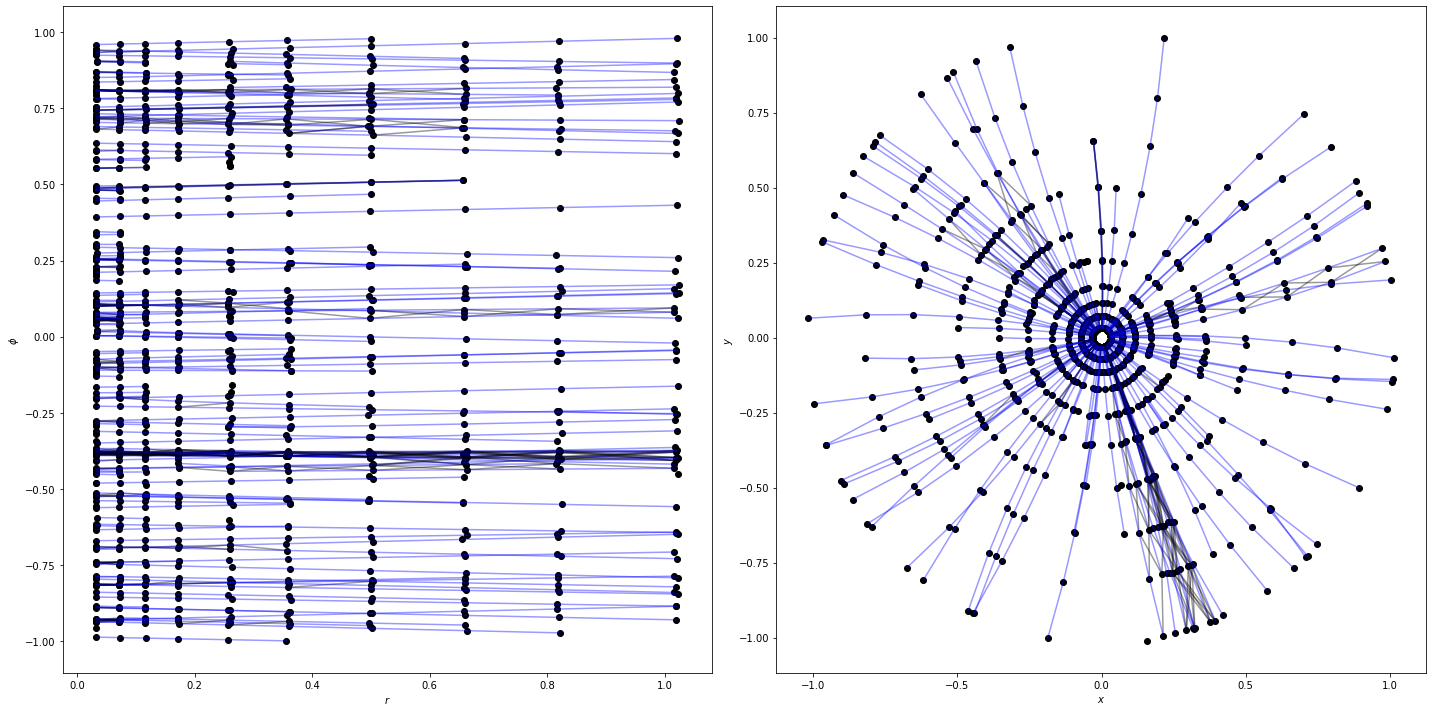

In [39]:
draw_sample(graph1.X, graph1.Ri, graph1.Ro, graph1.y, skip_false_edges=False)

plot the full graph

In [40]:
graph2=load_graph('../data/full_e.npz')






  0%|          | 0/30978 [00:00<?, ?it/s]




  0%|          | 54/30978 [00:00<00:57, 534.79it/s]




  0%|          | 100/30978 [00:00<01:00, 509.49it/s]




  0%|          | 148/30978 [00:00<01:01, 498.83it/s]




  1%|          | 196/30978 [00:00<01:02, 490.75it/s]




  1%|          | 238/30978 [00:00<01:05, 465.96it/s]




  1%|          | 282/30978 [00:00<01:07, 453.96it/s]




  1%|          | 325/30978 [00:00<01:53, 270.27it/s]




  1%|          | 362/30978 [00:01<01:44, 293.53it/s]




  1%|▏         | 405/30978 [00:01<01:34, 323.50it/s]




  1%|▏         | 448/30978 [00:01<01:27, 349.33it/s]




  2%|▏         | 492/30978 [00:01<01:21, 371.78it/s]




  2%|▏         | 533/30978 [00:01<01:19, 381.53it/s]




  2%|▏         | 574/30978 [00:01<01:23, 365.52it/s]




  2%|▏         | 613/30978 [00:01<01:22, 369.97it/s]




  2%|▏         | 652/30978 [00:01<01:23, 364.75it/s]




  2%|▏         | 690/30978 [00:01<01:23, 362.87it/s]




  2%|▏         | 729/30978 [00:01<01:2

  9%|▉         | 2856/30978 [00:12<04:10, 112.30it/s]




  9%|▉         | 2869/30978 [00:12<04:06, 114.12it/s]




  9%|▉         | 2881/30978 [00:12<04:07, 113.74it/s]




  9%|▉         | 2893/30978 [00:12<04:03, 115.47it/s]




  9%|▉         | 2905/30978 [00:13<04:02, 115.62it/s]




  9%|▉         | 2918/30978 [00:13<03:56, 118.74it/s]




  9%|▉         | 2931/30978 [00:13<03:54, 119.65it/s]




 10%|▉         | 2944/30978 [00:13<03:55, 118.98it/s]




 10%|▉         | 2957/30978 [00:13<03:54, 119.42it/s]




 10%|▉         | 2969/30978 [00:13<03:55, 118.91it/s]




 10%|▉         | 2981/30978 [00:13<03:58, 117.20it/s]




 10%|▉         | 2993/30978 [00:13<04:00, 116.37it/s]




 10%|▉         | 3006/30978 [00:13<03:56, 118.18it/s]




 10%|▉         | 3019/30978 [00:14<03:54, 119.34it/s]




 10%|▉         | 3032/30978 [00:14<03:49, 121.56it/s]




 10%|▉         | 3045/30978 [00:14<03:46, 123.08it/s]




 10%|▉         | 3058/30978 [00:14<03:48, 122.41it/s]




 10%|▉        

 13%|█▎        | 4139/30978 [00:24<04:48, 92.95it/s]




 13%|█▎        | 4149/30978 [00:25<04:43, 94.70it/s]




 13%|█▎        | 4159/30978 [00:25<04:38, 96.16it/s]




 13%|█▎        | 4169/30978 [00:25<04:35, 97.24it/s]




 13%|█▎        | 4179/30978 [00:25<04:35, 97.32it/s]




 14%|█▎        | 4189/30978 [00:25<04:33, 97.95it/s]




 14%|█▎        | 4199/30978 [00:25<04:34, 97.55it/s]




 14%|█▎        | 4209/30978 [00:25<04:36, 96.98it/s]




 14%|█▎        | 4219/30978 [00:25<04:37, 96.47it/s]




 14%|█▎        | 4229/30978 [00:25<04:41, 95.05it/s]




 14%|█▎        | 4239/30978 [00:25<04:39, 95.60it/s]




 14%|█▎        | 4249/30978 [00:26<04:39, 95.50it/s]




 14%|█▎        | 4259/30978 [00:26<04:38, 96.06it/s]




 14%|█▍        | 4269/30978 [00:26<04:40, 95.31it/s]




 14%|█▍        | 4279/30978 [00:26<05:21, 83.04it/s]




 14%|█▍        | 4288/30978 [00:26<09:19, 47.72it/s]




 14%|█▍        | 4295/30978 [00:27<11:41, 38.02it/s]




 14%|█▍        | 4301/30978 [00

 17%|█▋        | 5119/30978 [00:37<05:40, 75.84it/s]




 17%|█▋        | 5128/30978 [00:38<05:30, 78.18it/s]




 17%|█▋        | 5137/30978 [00:38<05:26, 79.23it/s]




 17%|█▋        | 5146/30978 [00:38<05:22, 79.98it/s]




 17%|█▋        | 5155/30978 [00:38<05:21, 80.41it/s]




 17%|█▋        | 5164/30978 [00:38<05:22, 80.01it/s]




 17%|█▋        | 5173/30978 [00:38<05:26, 78.93it/s]




 17%|█▋        | 5181/30978 [00:38<05:27, 78.71it/s]




 17%|█▋        | 5189/30978 [00:38<05:28, 78.54it/s]




 17%|█▋        | 5198/30978 [00:38<05:23, 79.65it/s]




 17%|█▋        | 5206/30978 [00:39<05:23, 79.74it/s]




 17%|█▋        | 5215/30978 [00:39<05:21, 80.25it/s]




 17%|█▋        | 5224/30978 [00:39<05:18, 80.74it/s]




 17%|█▋        | 5233/30978 [00:39<05:19, 80.62it/s]




 17%|█▋        | 5242/30978 [00:39<05:20, 80.39it/s]




 17%|█▋        | 5251/30978 [00:39<05:21, 79.91it/s]




 17%|█▋        | 5259/30978 [00:39<05:31, 77.67it/s]




 17%|█▋        | 5267/30978 [00

 19%|█▉        | 5993/30978 [00:50<06:00, 69.26it/s]




 19%|█▉        | 6001/30978 [00:50<05:59, 69.44it/s]




 19%|█▉        | 6009/30978 [00:50<05:57, 69.76it/s]




 19%|█▉        | 6017/30978 [00:51<05:53, 70.57it/s]




 19%|█▉        | 6025/30978 [00:51<05:50, 71.17it/s]




 19%|█▉        | 6033/30978 [00:51<05:49, 71.30it/s]




 20%|█▉        | 6041/30978 [00:51<05:49, 71.28it/s]




 20%|█▉        | 6049/30978 [00:51<06:15, 66.34it/s]




 20%|█▉        | 6056/30978 [00:51<06:12, 66.86it/s]




 20%|█▉        | 6063/30978 [00:51<06:18, 65.87it/s]




 20%|█▉        | 6070/30978 [00:51<06:21, 65.28it/s]




 20%|█▉        | 6077/30978 [00:51<06:15, 66.29it/s]




 20%|█▉        | 6085/30978 [00:52<06:08, 67.55it/s]




 20%|█▉        | 6092/30978 [00:52<06:04, 68.22it/s]




 20%|█▉        | 6099/30978 [00:52<06:05, 68.15it/s]




 20%|█▉        | 6106/30978 [00:52<06:04, 68.30it/s]




 20%|█▉        | 6114/30978 [00:52<06:03, 68.33it/s]




 20%|█▉        | 6121/30978 [00

 22%|██▏       | 6734/30978 [01:03<07:24, 54.51it/s]




 22%|██▏       | 6740/30978 [01:03<07:24, 54.57it/s]




 22%|██▏       | 6746/30978 [01:03<07:24, 54.48it/s]




 22%|██▏       | 6752/30978 [01:03<07:28, 53.98it/s]




 22%|██▏       | 6758/30978 [01:03<07:21, 54.84it/s]




 22%|██▏       | 6764/30978 [01:03<07:20, 55.01it/s]




 22%|██▏       | 6770/30978 [01:03<07:20, 54.98it/s]




 22%|██▏       | 6776/30978 [01:04<07:21, 54.83it/s]




 22%|██▏       | 6782/30978 [01:04<07:18, 55.13it/s]




 22%|██▏       | 6788/30978 [01:04<07:32, 53.44it/s]




 22%|██▏       | 6794/30978 [01:04<07:32, 53.44it/s]




 22%|██▏       | 6800/30978 [01:04<07:33, 53.35it/s]




 22%|██▏       | 6806/30978 [01:04<07:31, 53.60it/s]




 22%|██▏       | 6812/30978 [01:04<07:41, 52.42it/s]




 22%|██▏       | 6818/30978 [01:04<07:36, 52.88it/s]




 22%|██▏       | 6824/30978 [01:04<07:38, 52.65it/s]




 22%|██▏       | 6830/30978 [01:05<07:28, 53.86it/s]




 22%|██▏       | 6836/30978 [01

 24%|██▍       | 7410/30978 [01:15<07:58, 49.30it/s]




 24%|██▍       | 7416/30978 [01:16<07:47, 50.36it/s]




 24%|██▍       | 7422/30978 [01:16<07:37, 51.46it/s]




 24%|██▍       | 7428/30978 [01:16<07:34, 51.84it/s]




 24%|██▍       | 7434/30978 [01:16<07:32, 52.01it/s]




 24%|██▍       | 7440/30978 [01:16<07:40, 51.17it/s]




 24%|██▍       | 7446/30978 [01:16<07:42, 50.91it/s]




 24%|██▍       | 7452/30978 [01:16<07:40, 51.13it/s]




 24%|██▍       | 7458/30978 [01:16<07:38, 51.25it/s]




 24%|██▍       | 7464/30978 [01:16<07:36, 51.55it/s]




 24%|██▍       | 7470/30978 [01:17<07:40, 51.01it/s]




 24%|██▍       | 7476/30978 [01:17<07:40, 51.08it/s]




 24%|██▍       | 7482/30978 [01:17<07:37, 51.31it/s]




 24%|██▍       | 7488/30978 [01:17<07:34, 51.65it/s]




 24%|██▍       | 7494/30978 [01:17<07:34, 51.68it/s]




 24%|██▍       | 7500/30978 [01:17<07:40, 51.03it/s]




 24%|██▍       | 7506/30978 [01:17<07:45, 50.41it/s]




 24%|██▍       | 7512/30978 [01

 26%|██▌       | 8020/30978 [01:28<08:23, 45.64it/s]




 26%|██▌       | 8025/30978 [01:28<08:24, 45.52it/s]




 26%|██▌       | 8030/30978 [01:29<08:26, 45.35it/s]




 26%|██▌       | 8035/30978 [01:29<08:14, 46.43it/s]




 26%|██▌       | 8041/30978 [01:29<08:02, 47.56it/s]




 26%|██▌       | 8046/30978 [01:29<07:58, 47.96it/s]




 26%|██▌       | 8052/30978 [01:29<07:51, 48.57it/s]




 26%|██▌       | 8057/30978 [01:29<07:58, 47.89it/s]




 26%|██▌       | 8062/30978 [01:29<07:56, 48.08it/s]




 26%|██▌       | 8068/30978 [01:29<07:50, 48.68it/s]




 26%|██▌       | 8073/30978 [01:29<07:47, 48.99it/s]




 26%|██▌       | 8079/30978 [01:30<07:37, 50.03it/s]




 26%|██▌       | 8085/30978 [01:30<07:30, 50.84it/s]




 26%|██▌       | 8091/30978 [01:30<07:37, 50.00it/s]




 26%|██▌       | 8097/30978 [01:30<07:48, 48.85it/s]




 26%|██▌       | 8102/30978 [01:30<07:59, 47.69it/s]




 26%|██▌       | 8107/30978 [01:30<08:03, 47.29it/s]




 26%|██▌       | 8112/30978 [01

 28%|██▊       | 8592/30978 [01:41<08:47, 42.43it/s]




 28%|██▊       | 8597/30978 [01:41<08:53, 41.96it/s]




 28%|██▊       | 8602/30978 [01:41<09:05, 41.01it/s]




 28%|██▊       | 8607/30978 [01:41<08:58, 41.58it/s]




 28%|██▊       | 8612/30978 [01:41<08:50, 42.18it/s]




 28%|██▊       | 8617/30978 [01:42<08:45, 42.56it/s]




 28%|██▊       | 8622/30978 [01:42<08:47, 42.38it/s]




 28%|██▊       | 8627/30978 [01:42<08:44, 42.62it/s]




 28%|██▊       | 8632/30978 [01:42<08:41, 42.88it/s]




 28%|██▊       | 8637/30978 [01:42<08:40, 42.96it/s]




 28%|██▊       | 8642/30978 [01:42<08:32, 43.57it/s]




 28%|██▊       | 8647/30978 [01:42<08:28, 43.91it/s]




 28%|██▊       | 8652/30978 [01:42<08:20, 44.59it/s]




 28%|██▊       | 8657/30978 [01:42<08:21, 44.54it/s]




 28%|██▊       | 8662/30978 [01:43<08:29, 43.84it/s]




 28%|██▊       | 8667/30978 [01:43<08:33, 43.49it/s]




 28%|██▊       | 8672/30978 [01:43<08:41, 42.78it/s]




 28%|██▊       | 8677/30978 [01

 30%|██▉       | 9149/30978 [01:54<09:26, 38.55it/s]




 30%|██▉       | 9154/30978 [01:54<09:13, 39.43it/s]




 30%|██▉       | 9159/30978 [01:54<08:58, 40.49it/s]




 30%|██▉       | 9164/30978 [01:54<08:57, 40.61it/s]




 30%|██▉       | 9169/30978 [01:55<08:54, 40.77it/s]




 30%|██▉       | 9174/30978 [01:55<08:47, 41.33it/s]




 30%|██▉       | 9179/30978 [01:55<08:39, 41.94it/s]




 30%|██▉       | 9184/30978 [01:55<08:40, 41.90it/s]




 30%|██▉       | 9189/30978 [01:55<08:43, 41.60it/s]




 30%|██▉       | 9194/30978 [01:55<08:54, 40.72it/s]




 30%|██▉       | 9199/30978 [01:55<08:52, 40.90it/s]




 30%|██▉       | 9204/30978 [01:55<08:55, 40.67it/s]




 30%|██▉       | 9209/30978 [01:56<08:59, 40.35it/s]




 30%|██▉       | 9214/30978 [01:56<09:05, 39.88it/s]




 30%|██▉       | 9219/30978 [01:56<09:03, 40.02it/s]




 30%|██▉       | 9224/30978 [01:56<09:13, 39.27it/s]




 30%|██▉       | 9228/30978 [01:56<09:32, 38.01it/s]




 30%|██▉       | 9232/30978 [01

 31%|███▏      | 9706/30978 [02:07<08:48, 40.28it/s]




 31%|███▏      | 9711/30978 [02:08<08:51, 39.98it/s]




 31%|███▏      | 9716/30978 [02:08<08:49, 40.19it/s]




 31%|███▏      | 9721/30978 [02:08<09:00, 39.30it/s]




 31%|███▏      | 9725/30978 [02:08<09:08, 38.72it/s]




 31%|███▏      | 9729/30978 [02:08<09:14, 38.34it/s]




 31%|███▏      | 9733/30978 [02:08<09:39, 36.65it/s]




 31%|███▏      | 9737/30978 [02:08<09:42, 36.44it/s]




 31%|███▏      | 9741/30978 [02:08<09:42, 36.45it/s]




 31%|███▏      | 9746/30978 [02:09<09:22, 37.73it/s]




 31%|███▏      | 9750/30978 [02:09<09:18, 38.04it/s]




 31%|███▏      | 9754/30978 [02:09<09:16, 38.12it/s]




 31%|███▏      | 9758/30978 [02:09<09:10, 38.57it/s]




 32%|███▏      | 9762/30978 [02:09<09:09, 38.59it/s]




 32%|███▏      | 9766/30978 [02:09<09:07, 38.78it/s]




 32%|███▏      | 9770/30978 [02:09<09:03, 39.04it/s]




 32%|███▏      | 9774/30978 [02:09<09:08, 38.64it/s]




 32%|███▏      | 9778/30978 [02

 33%|███▎      | 10194/30978 [02:21<09:14, 37.45it/s]




 33%|███▎      | 10198/30978 [02:21<09:05, 38.13it/s]




 33%|███▎      | 10202/30978 [02:21<08:57, 38.63it/s]




 33%|███▎      | 10206/30978 [02:21<09:03, 38.21it/s]




 33%|███▎      | 10210/30978 [02:21<09:26, 36.63it/s]




 33%|███▎      | 10214/30978 [02:21<09:18, 37.20it/s]




 33%|███▎      | 10218/30978 [02:21<09:10, 37.68it/s]




 33%|███▎      | 10223/30978 [02:21<08:59, 38.46it/s]




 33%|███▎      | 10227/30978 [02:21<08:57, 38.61it/s]




 33%|███▎      | 10232/30978 [02:22<08:48, 39.22it/s]




 33%|███▎      | 10237/30978 [02:22<08:40, 39.82it/s]




 33%|███▎      | 10242/30978 [02:22<08:36, 40.19it/s]




 33%|███▎      | 10247/30978 [02:22<08:36, 40.14it/s]




 33%|███▎      | 10252/30978 [02:22<08:39, 39.92it/s]




 33%|███▎      | 10256/30978 [02:22<08:46, 39.35it/s]




 33%|███▎      | 10260/30978 [02:22<08:44, 39.51it/s]




 33%|███▎      | 10264/30978 [02:22<08:43, 39.58it/s]




 33%|███▎     

 34%|███▍      | 10653/30978 [02:33<09:39, 35.07it/s]




 34%|███▍      | 10657/30978 [02:33<09:42, 34.89it/s]




 34%|███▍      | 10661/30978 [02:33<09:41, 34.94it/s]




 34%|███▍      | 10665/30978 [02:33<09:32, 35.46it/s]




 34%|███▍      | 10669/30978 [02:33<09:32, 35.50it/s]




 34%|███▍      | 10673/30978 [02:34<09:31, 35.56it/s]




 34%|███▍      | 10677/30978 [02:34<09:19, 36.28it/s]




 34%|███▍      | 10681/30978 [02:34<09:48, 34.47it/s]




 34%|███▍      | 10685/30978 [02:34<10:26, 32.41it/s]




 35%|███▍      | 10689/30978 [02:34<10:41, 31.63it/s]




 35%|███▍      | 10693/30978 [02:34<10:27, 32.33it/s]




 35%|███▍      | 10697/30978 [02:34<10:10, 33.21it/s]




 35%|███▍      | 10701/30978 [02:34<09:48, 34.44it/s]




 35%|███▍      | 10705/30978 [02:35<10:16, 32.89it/s]




 35%|███▍      | 10709/30978 [02:35<10:34, 31.92it/s]




 35%|███▍      | 10713/30978 [02:35<10:36, 31.86it/s]




 35%|███▍      | 10717/30978 [02:35<10:19, 32.72it/s]




 35%|███▍     

 36%|███▌      | 11101/30978 [02:46<09:01, 36.73it/s]




 36%|███▌      | 11105/30978 [02:46<09:01, 36.70it/s]




 36%|███▌      | 11109/30978 [02:46<09:05, 36.44it/s]




 36%|███▌      | 11113/30978 [02:46<09:11, 35.99it/s]




 36%|███▌      | 11117/30978 [02:46<09:10, 36.09it/s]




 36%|███▌      | 11121/30978 [02:46<09:06, 36.32it/s]




 36%|███▌      | 11125/30978 [02:47<09:04, 36.46it/s]




 36%|███▌      | 11129/30978 [02:47<09:02, 36.59it/s]




 36%|███▌      | 11133/30978 [02:47<08:59, 36.81it/s]




 36%|███▌      | 11137/30978 [02:47<08:56, 36.97it/s]




 36%|███▌      | 11141/30978 [02:47<08:56, 36.95it/s]




 36%|███▌      | 11145/30978 [02:47<09:02, 36.58it/s]




 36%|███▌      | 11149/30978 [02:47<09:10, 36.00it/s]




 36%|███▌      | 11153/30978 [02:47<09:08, 36.14it/s]




 36%|███▌      | 11157/30978 [02:47<09:12, 35.86it/s]




 36%|███▌      | 11161/30978 [02:48<09:11, 35.92it/s]




 36%|███▌      | 11165/30978 [02:48<09:16, 35.63it/s]




 36%|███▌     

 37%|███▋      | 11528/30978 [02:59<09:40, 33.53it/s]




 37%|███▋      | 11532/30978 [03:00<09:40, 33.48it/s]




 37%|███▋      | 11536/30978 [03:00<09:35, 33.76it/s]




 37%|███▋      | 11540/30978 [03:00<09:32, 33.94it/s]




 37%|███▋      | 11544/30978 [03:00<09:28, 34.19it/s]




 37%|███▋      | 11548/30978 [03:00<09:30, 34.06it/s]




 37%|███▋      | 11552/30978 [03:00<09:34, 33.81it/s]




 37%|███▋      | 11556/30978 [03:00<09:33, 33.89it/s]




 37%|███▋      | 11560/30978 [03:00<09:34, 33.82it/s]




 37%|███▋      | 11564/30978 [03:01<09:28, 34.15it/s]




 37%|███▋      | 11568/30978 [03:01<09:25, 34.35it/s]




 37%|███▋      | 11572/30978 [03:01<09:27, 34.22it/s]




 37%|███▋      | 11576/30978 [03:01<09:24, 34.37it/s]




 37%|███▋      | 11580/30978 [03:01<09:29, 34.06it/s]




 37%|███▋      | 11584/30978 [03:01<09:32, 33.90it/s]




 37%|███▋      | 11588/30978 [03:01<09:33, 33.80it/s]




 37%|███▋      | 11592/30978 [03:01<09:33, 33.81it/s]




 37%|███▋     

 39%|███▊      | 11976/30978 [03:13<09:45, 32.45it/s]




 39%|███▊      | 11980/30978 [03:13<09:44, 32.49it/s]




 39%|███▊      | 11984/30978 [03:13<09:42, 32.61it/s]




 39%|███▊      | 11988/30978 [03:13<09:50, 32.14it/s]




 39%|███▊      | 11992/30978 [03:13<09:44, 32.48it/s]




 39%|███▊      | 11996/30978 [03:13<09:39, 32.76it/s]




 39%|███▊      | 12000/30978 [03:14<09:36, 32.90it/s]




 39%|███▉      | 12004/30978 [03:14<09:37, 32.85it/s]




 39%|███▉      | 12008/30978 [03:14<09:35, 32.98it/s]




 39%|███▉      | 12012/30978 [03:14<09:32, 33.11it/s]




 39%|███▉      | 12016/30978 [03:14<09:31, 33.15it/s]




 39%|███▉      | 12020/30978 [03:14<09:34, 33.02it/s]




 39%|███▉      | 12024/30978 [03:14<09:35, 32.93it/s]




 39%|███▉      | 12028/30978 [03:14<09:37, 32.79it/s]




 39%|███▉      | 12032/30978 [03:14<09:36, 32.85it/s]




 39%|███▉      | 12036/30978 [03:15<09:35, 32.91it/s]




 39%|███▉      | 12040/30978 [03:15<09:32, 33.06it/s]




 39%|███▉     

 40%|████      | 12424/30978 [03:27<09:41, 31.93it/s]




 40%|████      | 12428/30978 [03:27<09:40, 31.96it/s]




 40%|████      | 12432/30978 [03:27<09:40, 31.97it/s]




 40%|████      | 12436/30978 [03:27<09:34, 32.28it/s]




 40%|████      | 12440/30978 [03:27<09:36, 32.15it/s]




 40%|████      | 12444/30978 [03:27<09:41, 31.85it/s]




 40%|████      | 12448/30978 [03:27<09:55, 31.11it/s]




 40%|████      | 12452/30978 [03:27<10:14, 30.13it/s]




 40%|████      | 12456/30978 [03:28<10:23, 29.68it/s]




 40%|████      | 12459/30978 [03:28<10:40, 28.90it/s]




 40%|████      | 12462/30978 [03:28<10:57, 28.15it/s]




 40%|████      | 12465/30978 [03:28<11:33, 26.70it/s]




 40%|████      | 12468/30978 [03:28<11:24, 27.04it/s]




 40%|████      | 12471/30978 [03:28<11:11, 27.56it/s]




 40%|████      | 12474/30978 [03:28<10:57, 28.15it/s]




 40%|████      | 12477/30978 [03:28<10:54, 28.28it/s]




 40%|████      | 12480/30978 [03:29<10:47, 28.59it/s]




 40%|████     

 41%|████▏     | 12816/30978 [03:40<12:12, 24.78it/s]




 41%|████▏     | 12819/30978 [03:40<11:58, 25.27it/s]




 41%|████▏     | 12822/30978 [03:40<12:16, 24.65it/s]




 41%|████▏     | 12825/30978 [03:40<12:00, 25.20it/s]




 41%|████▏     | 12828/30978 [03:41<11:53, 25.45it/s]




 41%|████▏     | 12831/30978 [03:41<11:45, 25.71it/s]




 41%|████▏     | 12834/30978 [03:41<11:23, 26.53it/s]




 41%|████▏     | 12837/30978 [03:41<11:10, 27.05it/s]




 41%|████▏     | 12840/30978 [03:41<10:58, 27.56it/s]




 41%|████▏     | 12843/30978 [03:41<10:47, 27.99it/s]




 41%|████▏     | 12846/30978 [03:41<10:47, 28.00it/s]




 41%|████▏     | 12849/30978 [03:41<10:52, 27.77it/s]




 41%|████▏     | 12852/30978 [03:41<10:52, 27.77it/s]




 41%|████▏     | 12855/30978 [03:42<10:52, 27.76it/s]




 42%|████▏     | 12858/30978 [03:42<10:53, 27.71it/s]




 42%|████▏     | 12861/30978 [03:42<10:53, 27.73it/s]




 42%|████▏     | 12864/30978 [03:42<10:49, 27.90it/s]




 42%|████▏    

 42%|████▏     | 13152/30978 [03:52<10:32, 28.21it/s]




 42%|████▏     | 13155/30978 [03:52<10:30, 28.28it/s]




 42%|████▏     | 13158/30978 [03:52<10:21, 28.68it/s]




 42%|████▏     | 13161/30978 [03:52<10:19, 28.77it/s]




 42%|████▏     | 13164/30978 [03:52<10:15, 28.95it/s]




 43%|████▎     | 13167/30978 [03:52<10:09, 29.20it/s]




 43%|████▎     | 13171/30978 [03:53<26:12, 11.32it/s]




 43%|████▎     | 13174/30978 [03:53<21:36, 13.73it/s]




 43%|████▎     | 13177/30978 [03:54<18:20, 16.17it/s]




 43%|████▎     | 13180/30978 [03:54<16:09, 18.36it/s]




 43%|████▎     | 13183/30978 [03:54<14:30, 20.44it/s]




 43%|████▎     | 13186/30978 [03:54<13:25, 22.09it/s]




 43%|████▎     | 13189/30978 [03:54<12:37, 23.48it/s]




 43%|████▎     | 13192/30978 [03:54<12:10, 24.36it/s]




 43%|████▎     | 13195/30978 [03:54<11:58, 24.76it/s]




 43%|████▎     | 13198/30978 [03:54<11:36, 25.51it/s]




 43%|████▎     | 13201/30978 [03:54<11:38, 25.44it/s]




 43%|████▎    

 44%|████▎     | 13491/30978 [04:06<10:28, 27.83it/s]




 44%|████▎     | 13494/30978 [04:06<10:14, 28.44it/s]




 44%|████▎     | 13497/30978 [04:06<10:18, 28.25it/s]




 44%|████▎     | 13500/30978 [04:06<10:19, 28.21it/s]




 44%|████▎     | 13503/30978 [04:06<10:19, 28.23it/s]




 44%|████▎     | 13506/30978 [04:06<10:25, 27.92it/s]




 44%|████▎     | 13509/30978 [04:06<10:53, 26.74it/s]




 44%|████▎     | 13512/30978 [04:06<11:14, 25.88it/s]




 44%|████▎     | 13515/30978 [04:07<11:41, 24.89it/s]




 44%|████▎     | 13519/30978 [04:07<11:05, 26.22it/s]




 44%|████▎     | 13522/30978 [04:07<10:47, 26.94it/s]




 44%|████▎     | 13525/30978 [04:07<10:32, 27.59it/s]




 44%|████▎     | 13528/30978 [04:07<10:21, 28.08it/s]




 44%|████▎     | 13531/30978 [04:07<10:10, 28.58it/s]




 44%|████▎     | 13534/30978 [04:07<10:08, 28.67it/s]




 44%|████▎     | 13537/30978 [04:07<10:11, 28.51it/s]




 44%|████▎     | 13540/30978 [04:07<10:13, 28.42it/s]




 44%|████▎    

 45%|████▍     | 13844/30978 [04:19<10:17, 27.73it/s]




 45%|████▍     | 13847/30978 [04:19<10:08, 28.13it/s]




 45%|████▍     | 13850/30978 [04:19<11:12, 25.46it/s]




 45%|████▍     | 13853/30978 [04:19<11:34, 24.67it/s]




 45%|████▍     | 13856/30978 [04:19<10:57, 26.04it/s]




 45%|████▍     | 13859/30978 [04:19<10:37, 26.84it/s]




 45%|████▍     | 13862/30978 [04:19<10:30, 27.13it/s]




 45%|████▍     | 13865/30978 [04:19<10:23, 27.43it/s]




 45%|████▍     | 13868/30978 [04:19<10:16, 27.75it/s]




 45%|████▍     | 13871/30978 [04:20<10:28, 27.20it/s]




 45%|████▍     | 13874/30978 [04:20<11:13, 25.40it/s]




 45%|████▍     | 13877/30978 [04:20<11:01, 25.87it/s]




 45%|████▍     | 13880/30978 [04:20<11:31, 24.72it/s]




 45%|████▍     | 13883/30978 [04:20<11:53, 23.96it/s]




 45%|████▍     | 13886/30978 [04:20<16:00, 17.79it/s]




 45%|████▍     | 13889/30978 [04:21<18:11, 15.66it/s]




 45%|████▍     | 13892/30978 [04:21<15:56, 17.87it/s]




 45%|████▍    

 46%|████▌     | 14180/30978 [04:32<10:55, 25.61it/s]




 46%|████▌     | 14183/30978 [04:32<10:44, 26.06it/s]




 46%|████▌     | 14186/30978 [04:32<10:48, 25.90it/s]




 46%|████▌     | 14189/30978 [04:33<10:29, 26.68it/s]




 46%|████▌     | 14193/30978 [04:33<09:57, 28.08it/s]




 46%|████▌     | 14197/30978 [04:33<09:28, 29.51it/s]




 46%|████▌     | 14201/30978 [04:33<09:03, 30.85it/s]




 46%|████▌     | 14205/30978 [04:33<09:00, 31.03it/s]




 46%|████▌     | 14209/30978 [04:33<09:05, 30.76it/s]




 46%|████▌     | 14213/30978 [04:33<09:08, 30.58it/s]




 46%|████▌     | 14217/30978 [04:33<09:12, 30.33it/s]




 46%|████▌     | 14221/30978 [04:34<09:37, 28.99it/s]




 46%|████▌     | 14224/30978 [04:34<10:06, 27.61it/s]




 46%|████▌     | 14227/30978 [04:34<10:24, 26.81it/s]




 46%|████▌     | 14230/30978 [04:34<10:31, 26.52it/s]




 46%|████▌     | 14233/30978 [04:34<10:38, 26.24it/s]




 46%|████▌     | 14236/30978 [04:34<10:47, 25.84it/s]




 46%|████▌    

 47%|████▋     | 14524/30978 [04:45<10:42, 25.61it/s]




 47%|████▋     | 14527/30978 [04:46<11:53, 23.06it/s]




 47%|████▋     | 14530/30978 [04:46<12:02, 22.76it/s]




 47%|████▋     | 14533/30978 [04:46<12:01, 22.81it/s]




 47%|████▋     | 14536/30978 [04:46<12:16, 22.33it/s]




 47%|████▋     | 14539/30978 [04:46<12:29, 21.92it/s]




 47%|████▋     | 14542/30978 [04:46<12:22, 22.15it/s]




 47%|████▋     | 14545/30978 [04:46<12:25, 22.05it/s]




 47%|████▋     | 14548/30978 [04:47<12:33, 21.81it/s]




 47%|████▋     | 14551/30978 [04:47<13:41, 20.00it/s]




 47%|████▋     | 14554/30978 [04:47<13:59, 19.57it/s]




 47%|████▋     | 14557/30978 [04:47<13:04, 20.93it/s]




 47%|████▋     | 14560/30978 [04:47<12:26, 21.98it/s]




 47%|████▋     | 14563/30978 [04:47<11:54, 22.96it/s]




 47%|████▋     | 14566/30978 [04:47<11:30, 23.77it/s]




 47%|████▋     | 14569/30978 [04:47<11:04, 24.68it/s]




 47%|████▋     | 14572/30978 [04:48<10:50, 25.23it/s]




 47%|████▋    

 48%|████▊     | 14860/30978 [04:59<10:36, 25.32it/s]




 48%|████▊     | 14863/30978 [04:59<10:37, 25.30it/s]




 48%|████▊     | 14866/30978 [04:59<10:35, 25.35it/s]




 48%|████▊     | 14869/30978 [04:59<10:33, 25.44it/s]




 48%|████▊     | 14872/30978 [04:59<10:27, 25.65it/s]




 48%|████▊     | 14875/30978 [05:00<10:27, 25.66it/s]




 48%|████▊     | 14878/30978 [05:00<10:33, 25.42it/s]




 48%|████▊     | 14881/30978 [05:00<10:46, 24.89it/s]




 48%|████▊     | 14884/30978 [05:00<10:38, 25.22it/s]




 48%|████▊     | 14887/30978 [05:00<10:37, 25.24it/s]




 48%|████▊     | 14890/30978 [05:00<10:38, 25.19it/s]




 48%|████▊     | 14893/30978 [05:00<10:35, 25.33it/s]




 48%|████▊     | 14896/30978 [05:00<10:30, 25.49it/s]




 48%|████▊     | 14899/30978 [05:01<10:25, 25.69it/s]




 48%|████▊     | 14902/30978 [05:01<10:30, 25.49it/s]




 48%|████▊     | 14905/30978 [05:01<10:46, 24.87it/s]




 48%|████▊     | 14908/30978 [05:01<10:39, 25.15it/s]




 48%|████▊    

 49%|████▉     | 15196/30978 [05:12<10:06, 26.03it/s]




 49%|████▉     | 15199/30978 [05:12<10:10, 25.83it/s]




 49%|████▉     | 15202/30978 [05:12<10:09, 25.87it/s]




 49%|████▉     | 15205/30978 [05:12<10:04, 26.08it/s]




 49%|████▉     | 15208/30978 [05:13<10:05, 26.03it/s]




 49%|████▉     | 15211/30978 [05:13<10:18, 25.51it/s]




 49%|████▉     | 15214/30978 [05:13<10:17, 25.54it/s]




 49%|████▉     | 15217/30978 [05:13<10:15, 25.62it/s]




 49%|████▉     | 15220/30978 [05:13<10:15, 25.59it/s]




 49%|████▉     | 15223/30978 [05:13<10:14, 25.62it/s]




 49%|████▉     | 15226/30978 [05:13<10:19, 25.41it/s]




 49%|████▉     | 15229/30978 [05:13<10:15, 25.59it/s]




 49%|████▉     | 15232/30978 [05:13<10:17, 25.49it/s]




 49%|████▉     | 15235/30978 [05:14<10:16, 25.52it/s]




 49%|████▉     | 15238/30978 [05:14<10:13, 25.64it/s]




 49%|████▉     | 15241/30978 [05:14<10:13, 25.65it/s]




 49%|████▉     | 15244/30978 [05:14<10:07, 25.91it/s]




 49%|████▉    

 50%|█████     | 15532/30978 [05:26<10:57, 23.48it/s]




 50%|█████     | 15535/30978 [05:26<10:43, 23.99it/s]




 50%|█████     | 15538/30978 [05:26<10:40, 24.09it/s]




 50%|█████     | 15541/30978 [05:26<10:37, 24.23it/s]




 50%|█████     | 15544/30978 [05:26<10:29, 24.50it/s]




 50%|█████     | 15547/30978 [05:26<10:43, 23.99it/s]




 50%|█████     | 15550/30978 [05:26<10:41, 24.04it/s]




 50%|█████     | 15553/30978 [05:26<10:35, 24.26it/s]




 50%|█████     | 15556/30978 [05:27<10:48, 23.77it/s]




 50%|█████     | 15559/30978 [05:27<10:51, 23.66it/s]




 50%|█████     | 15562/30978 [05:27<10:47, 23.79it/s]




 50%|█████     | 15565/30978 [05:27<10:48, 23.78it/s]




 50%|█████     | 15568/30978 [05:27<10:47, 23.80it/s]




 50%|█████     | 15571/30978 [05:27<10:45, 23.87it/s]




 50%|█████     | 15574/30978 [05:27<10:57, 23.43it/s]




 50%|█████     | 15577/30978 [05:27<11:00, 23.33it/s]




 50%|█████     | 15580/30978 [05:28<11:00, 23.33it/s]




 50%|█████    

 51%|█████     | 15868/30978 [05:40<10:55, 23.06it/s]




 51%|█████     | 15871/30978 [05:40<10:51, 23.20it/s]




 51%|█████     | 15874/30978 [05:40<10:49, 23.24it/s]




 51%|█████▏    | 15877/30978 [05:40<10:51, 23.19it/s]




 51%|█████▏    | 15880/30978 [05:40<10:45, 23.40it/s]




 51%|█████▏    | 15883/30978 [05:40<10:39, 23.61it/s]




 51%|█████▏    | 15886/30978 [05:41<10:39, 23.60it/s]




 51%|█████▏    | 15889/30978 [05:41<10:35, 23.73it/s]




 51%|█████▏    | 15892/30978 [05:41<10:34, 23.76it/s]




 51%|█████▏    | 15895/30978 [05:41<10:37, 23.66it/s]




 51%|█████▏    | 15898/30978 [05:41<10:38, 23.64it/s]




 51%|█████▏    | 15901/30978 [05:41<10:47, 23.27it/s]




 51%|█████▏    | 15904/30978 [05:41<10:45, 23.33it/s]




 51%|█████▏    | 15907/30978 [05:41<10:41, 23.50it/s]




 51%|█████▏    | 15910/30978 [05:42<10:41, 23.51it/s]




 51%|█████▏    | 15913/30978 [05:42<10:43, 23.43it/s]




 51%|█████▏    | 15916/30978 [05:42<10:42, 23.43it/s]




 51%|█████▏   

 52%|█████▏    | 16204/30978 [05:54<10:51, 22.68it/s]




 52%|█████▏    | 16207/30978 [05:54<10:59, 22.39it/s]




 52%|█████▏    | 16210/30978 [05:54<10:51, 22.67it/s]




 52%|█████▏    | 16213/30978 [05:55<10:42, 22.97it/s]




 52%|█████▏    | 16216/30978 [05:55<10:32, 23.33it/s]




 52%|█████▏    | 16219/30978 [05:55<10:27, 23.51it/s]




 52%|█████▏    | 16222/30978 [05:55<10:29, 23.45it/s]




 52%|█████▏    | 16225/30978 [05:55<10:40, 23.05it/s]




 52%|█████▏    | 16228/30978 [05:55<10:59, 22.38it/s]




 52%|█████▏    | 16231/30978 [05:55<10:51, 22.65it/s]




 52%|█████▏    | 16234/30978 [05:55<10:41, 22.99it/s]




 52%|█████▏    | 16237/30978 [05:56<10:35, 23.21it/s]




 52%|█████▏    | 16240/30978 [05:56<10:29, 23.42it/s]




 52%|█████▏    | 16243/30978 [05:56<10:29, 23.39it/s]




 52%|█████▏    | 16246/30978 [05:56<10:29, 23.40it/s]




 52%|█████▏    | 16249/30978 [05:56<10:30, 23.37it/s]




 52%|█████▏    | 16252/30978 [05:56<10:26, 23.50it/s]




 52%|█████▏   

 53%|█████▎    | 16540/30978 [06:09<10:48, 22.26it/s]




 53%|█████▎    | 16543/30978 [06:09<10:44, 22.41it/s]




 53%|█████▎    | 16546/30978 [06:09<10:39, 22.56it/s]




 53%|█████▎    | 16549/30978 [06:09<10:39, 22.57it/s]




 53%|█████▎    | 16552/30978 [06:09<10:38, 22.59it/s]




 53%|█████▎    | 16555/30978 [06:10<10:31, 22.83it/s]




 53%|█████▎    | 16558/30978 [06:10<10:29, 22.92it/s]




 53%|█████▎    | 16561/30978 [06:10<10:27, 22.96it/s]




 53%|█████▎    | 16564/30978 [06:10<10:48, 22.22it/s]




 53%|█████▎    | 16567/30978 [06:10<10:45, 22.34it/s]




 53%|█████▎    | 16570/30978 [06:10<10:44, 22.34it/s]




 53%|█████▎    | 16573/30978 [06:10<10:51, 22.11it/s]




 54%|█████▎    | 16576/30978 [06:10<10:46, 22.28it/s]




 54%|█████▎    | 16579/30978 [06:11<10:40, 22.49it/s]




 54%|█████▎    | 16582/30978 [06:11<10:36, 22.63it/s]




 54%|█████▎    | 16585/30978 [06:11<10:34, 22.68it/s]




 54%|█████▎    | 16588/30978 [06:11<10:36, 22.62it/s]




 54%|█████▎   

 54%|█████▍    | 16872/30978 [06:24<11:07, 21.13it/s]




 54%|█████▍    | 16875/30978 [06:24<11:45, 19.99it/s]




 54%|█████▍    | 16878/30978 [06:25<13:10, 17.84it/s]




 54%|█████▍    | 16880/30978 [06:25<12:54, 18.19it/s]




 54%|█████▍    | 16883/30978 [06:25<12:25, 18.91it/s]




 55%|█████▍    | 16886/30978 [06:25<11:46, 19.94it/s]




 55%|█████▍    | 16889/30978 [06:25<11:35, 20.26it/s]




 55%|█████▍    | 16892/30978 [06:25<11:17, 20.80it/s]




 55%|█████▍    | 16895/30978 [06:25<10:59, 21.35it/s]




 55%|█████▍    | 16898/30978 [06:26<10:50, 21.63it/s]




 55%|█████▍    | 16901/30978 [06:26<10:38, 22.06it/s]




 55%|█████▍    | 16904/30978 [06:26<10:26, 22.48it/s]




 55%|█████▍    | 16907/30978 [06:26<10:21, 22.63it/s]




 55%|█████▍    | 16910/30978 [06:26<10:21, 22.63it/s]




 55%|█████▍    | 16913/30978 [06:26<10:20, 22.65it/s]




 55%|█████▍    | 16916/30978 [06:26<10:19, 22.70it/s]




 55%|█████▍    | 16919/30978 [06:26<10:14, 22.87it/s]




 55%|█████▍   

 56%|█████▌    | 17198/30978 [06:41<10:34, 21.72it/s]




 56%|█████▌    | 17201/30978 [06:41<10:29, 21.90it/s]




 56%|█████▌    | 17204/30978 [06:41<10:22, 22.13it/s]




 56%|█████▌    | 17207/30978 [06:41<10:16, 22.33it/s]




 56%|█████▌    | 17210/30978 [06:41<10:13, 22.43it/s]




 56%|█████▌    | 17213/30978 [06:41<10:16, 22.31it/s]




 56%|█████▌    | 17216/30978 [06:41<10:16, 22.34it/s]




 56%|█████▌    | 17219/30978 [06:41<10:12, 22.48it/s]




 56%|█████▌    | 17222/30978 [06:42<10:13, 22.43it/s]




 56%|█████▌    | 17225/30978 [06:42<10:15, 22.34it/s]




 56%|█████▌    | 17228/30978 [06:42<10:13, 22.42it/s]




 56%|█████▌    | 17231/30978 [06:42<10:12, 22.46it/s]




 56%|█████▌    | 17234/30978 [06:42<10:09, 22.54it/s]




 56%|█████▌    | 17237/30978 [06:42<10:10, 22.50it/s]




 56%|█████▌    | 17240/30978 [06:42<10:14, 22.35it/s]




 56%|█████▌    | 17243/30978 [06:43<10:18, 22.21it/s]




 56%|█████▌    | 17246/30978 [06:43<10:16, 22.29it/s]




 56%|█████▌   

 57%|█████▋    | 17534/30978 [06:56<10:06, 22.15it/s]




 57%|█████▋    | 17537/30978 [06:56<10:06, 22.18it/s]




 57%|█████▋    | 17540/30978 [06:56<10:09, 22.05it/s]




 57%|█████▋    | 17543/30978 [06:56<10:16, 21.81it/s]




 57%|█████▋    | 17546/30978 [06:56<10:15, 21.81it/s]




 57%|█████▋    | 17549/30978 [06:57<10:15, 21.81it/s]




 57%|█████▋    | 17552/30978 [06:57<10:11, 21.96it/s]




 57%|█████▋    | 17555/30978 [06:57<10:12, 21.93it/s]




 57%|█████▋    | 17558/30978 [06:57<10:08, 22.05it/s]




 57%|█████▋    | 17561/30978 [06:57<10:07, 22.08it/s]




 57%|█████▋    | 17564/30978 [06:57<10:12, 21.91it/s]




 57%|█████▋    | 17567/30978 [06:57<10:11, 21.91it/s]




 57%|█████▋    | 17570/30978 [06:57<10:25, 21.45it/s]




 57%|█████▋    | 17573/30978 [06:58<10:19, 21.65it/s]




 57%|█████▋    | 17576/30978 [06:58<10:13, 21.83it/s]




 57%|█████▋    | 17579/30978 [06:58<10:14, 21.79it/s]




 57%|█████▋    | 17582/30978 [06:58<10:12, 21.85it/s]




 57%|█████▋   

 58%|█████▊    | 17870/30978 [07:11<10:10, 21.46it/s]




 58%|█████▊    | 17873/30978 [07:11<10:13, 21.35it/s]




 58%|█████▊    | 17876/30978 [07:12<10:10, 21.45it/s]




 58%|█████▊    | 17879/30978 [07:12<10:08, 21.52it/s]




 58%|█████▊    | 17882/30978 [07:12<10:06, 21.61it/s]




 58%|█████▊    | 17885/30978 [07:12<10:08, 21.51it/s]




 58%|█████▊    | 17888/30978 [07:12<10:07, 21.55it/s]




 58%|█████▊    | 17891/30978 [07:12<10:11, 21.41it/s]




 58%|█████▊    | 17894/30978 [07:12<10:12, 21.37it/s]




 58%|█████▊    | 17897/30978 [07:13<10:13, 21.31it/s]




 58%|█████▊    | 17900/30978 [07:13<10:11, 21.37it/s]




 58%|█████▊    | 17903/30978 [07:13<10:08, 21.49it/s]




 58%|█████▊    | 17906/30978 [07:13<10:04, 21.63it/s]




 58%|█████▊    | 17909/30978 [07:13<10:07, 21.52it/s]




 58%|█████▊    | 17912/30978 [07:13<10:07, 21.51it/s]




 58%|█████▊    | 17915/30978 [07:13<10:11, 21.36it/s]




 58%|█████▊    | 17918/30978 [07:14<10:10, 21.39it/s]




 58%|█████▊   

 59%|█████▉    | 18206/30978 [07:27<10:05, 21.08it/s]




 59%|█████▉    | 18209/30978 [07:27<10:08, 20.98it/s]




 59%|█████▉    | 18212/30978 [07:27<10:10, 20.91it/s]




 59%|█████▉    | 18215/30978 [07:27<10:08, 20.99it/s]




 59%|█████▉    | 18218/30978 [07:28<10:06, 21.05it/s]




 59%|█████▉    | 18221/30978 [07:28<10:01, 21.20it/s]




 59%|█████▉    | 18224/30978 [07:28<10:40, 19.92it/s]




 59%|█████▉    | 18227/30978 [07:28<10:30, 20.22it/s]




 59%|█████▉    | 18230/30978 [07:28<10:26, 20.34it/s]




 59%|█████▉    | 18233/30978 [07:28<10:20, 20.53it/s]




 59%|█████▉    | 18236/30978 [07:28<10:12, 20.81it/s]




 59%|█████▉    | 18239/30978 [07:29<10:08, 20.95it/s]




 59%|█████▉    | 18242/30978 [07:29<10:05, 21.05it/s]




 59%|█████▉    | 18245/30978 [07:29<10:04, 21.07it/s]




 59%|█████▉    | 18248/30978 [07:29<10:04, 21.06it/s]




 59%|█████▉    | 18251/30978 [07:29<10:12, 20.76it/s]




 59%|█████▉    | 18254/30978 [07:29<10:08, 20.92it/s]




 59%|█████▉   

 60%|█████▉    | 18542/30978 [07:43<09:55, 20.88it/s]




 60%|█████▉    | 18545/30978 [07:43<09:57, 20.81it/s]




 60%|█████▉    | 18548/30978 [07:43<09:59, 20.73it/s]




 60%|█████▉    | 18551/30978 [07:43<09:56, 20.84it/s]




 60%|█████▉    | 18554/30978 [07:44<09:55, 20.88it/s]




 60%|█████▉    | 18557/30978 [07:44<09:54, 20.90it/s]




 60%|█████▉    | 18560/30978 [07:44<09:51, 21.01it/s]




 60%|█████▉    | 18563/30978 [07:44<09:53, 20.92it/s]




 60%|█████▉    | 18566/30978 [07:44<09:59, 20.71it/s]




 60%|█████▉    | 18569/30978 [07:44<09:59, 20.70it/s]




 60%|█████▉    | 18572/30978 [07:45<09:56, 20.79it/s]




 60%|█████▉    | 18575/30978 [07:45<09:55, 20.83it/s]




 60%|█████▉    | 18578/30978 [07:45<09:51, 20.98it/s]




 60%|█████▉    | 18581/30978 [07:45<09:49, 21.02it/s]




 60%|█████▉    | 18584/30978 [07:45<09:50, 21.00it/s]




 60%|██████    | 18587/30978 [07:45<09:52, 20.92it/s]




 60%|██████    | 18590/30978 [07:45<09:55, 20.81it/s]




 60%|██████   

 61%|██████    | 18878/30978 [07:59<09:48, 20.56it/s]




 61%|██████    | 18881/30978 [07:59<09:50, 20.49it/s]




 61%|██████    | 18884/30978 [08:00<09:47, 20.59it/s]




 61%|██████    | 18887/30978 [08:00<09:45, 20.66it/s]




 61%|██████    | 18890/30978 [08:00<09:46, 20.62it/s]




 61%|██████    | 18893/30978 [08:00<09:46, 20.61it/s]




 61%|██████    | 18896/30978 [08:00<09:48, 20.53it/s]




 61%|██████    | 18899/30978 [08:00<09:50, 20.44it/s]




 61%|██████    | 18902/30978 [08:00<09:50, 20.45it/s]




 61%|██████    | 18905/30978 [08:01<09:51, 20.42it/s]




 61%|██████    | 18908/30978 [08:01<09:49, 20.46it/s]




 61%|██████    | 18911/30978 [08:01<09:47, 20.54it/s]




 61%|██████    | 18914/30978 [08:01<09:53, 20.32it/s]




 61%|██████    | 18917/30978 [08:01<09:54, 20.30it/s]




 61%|██████    | 18920/30978 [08:01<09:57, 20.18it/s]




 61%|██████    | 18923/30978 [08:02<09:54, 20.28it/s]




 61%|██████    | 18926/30978 [08:02<09:52, 20.34it/s]




 61%|██████   

 62%|██████▏   | 19214/30978 [08:16<09:45, 20.10it/s]




 62%|██████▏   | 19217/30978 [08:16<09:41, 20.21it/s]




 62%|██████▏   | 19220/30978 [08:16<09:44, 20.10it/s]




 62%|██████▏   | 19223/30978 [08:16<09:45, 20.09it/s]




 62%|██████▏   | 19226/30978 [08:16<09:46, 20.04it/s]




 62%|██████▏   | 19229/30978 [08:17<09:43, 20.14it/s]




 62%|██████▏   | 19232/30978 [08:17<09:42, 20.17it/s]




 62%|██████▏   | 19235/30978 [08:17<09:41, 20.20it/s]




 62%|██████▏   | 19238/30978 [08:17<09:40, 20.24it/s]




 62%|██████▏   | 19241/30978 [08:17<09:41, 20.19it/s]




 62%|██████▏   | 19244/30978 [08:17<09:59, 19.58it/s]




 62%|██████▏   | 19247/30978 [08:17<09:53, 19.77it/s]




 62%|██████▏   | 19249/30978 [08:18<09:57, 19.64it/s]




 62%|██████▏   | 19251/30978 [08:18<10:02, 19.46it/s]




 62%|██████▏   | 19253/30978 [08:18<09:59, 19.57it/s]




 62%|██████▏   | 19255/30978 [08:18<09:57, 19.63it/s]




 62%|██████▏   | 19257/30978 [08:18<09:55, 19.67it/s]




 62%|██████▏  

 63%|██████▎   | 19458/30978 [08:28<09:53, 19.41it/s]




 63%|██████▎   | 19460/30978 [08:28<09:55, 19.34it/s]




 63%|██████▎   | 19462/30978 [08:28<09:50, 19.51it/s]




 63%|██████▎   | 19464/30978 [08:29<09:46, 19.63it/s]




 63%|██████▎   | 19466/30978 [08:29<09:46, 19.62it/s]




 63%|██████▎   | 19468/30978 [08:29<09:45, 19.64it/s]




 63%|██████▎   | 19470/30978 [08:29<09:46, 19.62it/s]




 63%|██████▎   | 19472/30978 [08:29<09:46, 19.61it/s]




 63%|██████▎   | 19474/30978 [08:29<09:49, 19.52it/s]




 63%|██████▎   | 19476/30978 [08:29<09:53, 19.39it/s]




 63%|██████▎   | 19478/30978 [08:29<10:01, 19.11it/s]




 63%|██████▎   | 19480/30978 [08:29<09:59, 19.16it/s]




 63%|██████▎   | 19482/30978 [08:29<09:57, 19.25it/s]




 63%|██████▎   | 19484/30978 [08:30<09:54, 19.35it/s]




 63%|██████▎   | 19486/30978 [08:30<09:54, 19.32it/s]




 63%|██████▎   | 19488/30978 [08:30<09:53, 19.37it/s]




 63%|██████▎   | 19490/30978 [08:30<09:51, 19.43it/s]




 63%|██████▎  

 64%|██████▎   | 19682/30978 [08:40<09:49, 19.17it/s]




 64%|██████▎   | 19684/30978 [08:40<09:47, 19.22it/s]




 64%|██████▎   | 19686/30978 [08:40<09:45, 19.30it/s]




 64%|██████▎   | 19688/30978 [08:40<09:43, 19.35it/s]




 64%|██████▎   | 19690/30978 [08:40<09:47, 19.22it/s]




 64%|██████▎   | 19692/30978 [08:40<09:49, 19.15it/s]




 64%|██████▎   | 19694/30978 [08:40<09:45, 19.26it/s]




 64%|██████▎   | 19696/30978 [08:41<09:45, 19.25it/s]




 64%|██████▎   | 19698/30978 [08:41<09:45, 19.26it/s]




 64%|██████▎   | 19700/30978 [08:41<09:45, 19.26it/s]




 64%|██████▎   | 19702/30978 [08:41<09:46, 19.22it/s]




 64%|██████▎   | 19704/30978 [08:41<09:44, 19.28it/s]




 64%|██████▎   | 19706/30978 [08:41<09:45, 19.27it/s]




 64%|██████▎   | 19708/30978 [08:41<09:50, 19.08it/s]




 64%|██████▎   | 19710/30978 [08:41<09:48, 19.14it/s]




 64%|██████▎   | 19712/30978 [08:41<09:50, 19.08it/s]




 64%|██████▎   | 19714/30978 [08:41<09:48, 19.14it/s]




 64%|██████▎  

 64%|██████▍   | 19906/30978 [08:52<09:50, 18.76it/s]




 64%|██████▍   | 19908/30978 [08:52<09:49, 18.79it/s]




 64%|██████▍   | 19910/30978 [08:52<09:47, 18.85it/s]




 64%|██████▍   | 19912/30978 [08:52<09:54, 18.61it/s]




 64%|██████▍   | 19914/30978 [08:52<09:52, 18.67it/s]




 64%|██████▍   | 19916/30978 [08:52<09:50, 18.73it/s]




 64%|██████▍   | 19918/30978 [08:52<09:51, 18.71it/s]




 64%|██████▍   | 19920/30978 [08:52<09:54, 18.61it/s]




 64%|██████▍   | 19922/30978 [08:52<09:51, 18.70it/s]




 64%|██████▍   | 19924/30978 [08:53<09:48, 18.79it/s]




 64%|██████▍   | 19926/30978 [08:53<09:44, 18.91it/s]




 64%|██████▍   | 19928/30978 [08:53<09:40, 19.04it/s]




 64%|██████▍   | 19930/30978 [08:53<09:41, 18.99it/s]




 64%|██████▍   | 19932/30978 [08:53<09:40, 19.03it/s]




 64%|██████▍   | 19934/30978 [08:53<09:42, 18.95it/s]




 64%|██████▍   | 19936/30978 [08:53<09:48, 18.76it/s]




 64%|██████▍   | 19938/30978 [08:53<09:44, 18.90it/s]




 64%|██████▍  

 65%|██████▍   | 20130/30978 [09:03<09:38, 18.74it/s]




 65%|██████▍   | 20132/30978 [09:04<09:39, 18.73it/s]




 65%|██████▍   | 20134/30978 [09:04<09:34, 18.87it/s]




 65%|██████▌   | 20136/30978 [09:04<09:33, 18.91it/s]




 65%|██████▌   | 20138/30978 [09:04<09:36, 18.80it/s]




 65%|██████▌   | 20140/30978 [09:04<09:39, 18.70it/s]




 65%|██████▌   | 20142/30978 [09:04<09:40, 18.67it/s]




 65%|██████▌   | 20144/30978 [09:04<09:41, 18.63it/s]




 65%|██████▌   | 20146/30978 [09:04<09:41, 18.62it/s]




 65%|██████▌   | 20148/30978 [09:04<09:37, 18.76it/s]




 65%|██████▌   | 20150/30978 [09:05<10:31, 17.15it/s]




 65%|██████▌   | 20152/30978 [09:05<10:15, 17.59it/s]




 65%|██████▌   | 20154/30978 [09:05<10:01, 17.99it/s]




 65%|██████▌   | 20156/30978 [09:05<09:51, 18.29it/s]




 65%|██████▌   | 20158/30978 [09:05<09:45, 18.49it/s]




 65%|██████▌   | 20160/30978 [09:05<09:43, 18.53it/s]




 65%|██████▌   | 20162/30978 [09:05<09:42, 18.56it/s]




 65%|██████▌  

 66%|██████▌   | 20354/30978 [09:16<09:37, 18.39it/s]




 66%|██████▌   | 20356/30978 [09:16<09:35, 18.45it/s]




 66%|██████▌   | 20358/30978 [09:16<09:32, 18.55it/s]




 66%|██████▌   | 20360/30978 [09:16<09:31, 18.58it/s]




 66%|██████▌   | 20362/30978 [09:16<09:29, 18.65it/s]




 66%|██████▌   | 20364/30978 [09:16<09:29, 18.63it/s]




 66%|██████▌   | 20366/30978 [09:16<09:39, 18.32it/s]




 66%|██████▌   | 20368/30978 [09:16<09:38, 18.35it/s]




 66%|██████▌   | 20370/30978 [09:16<09:36, 18.42it/s]




 66%|██████▌   | 20372/30978 [09:17<09:32, 18.52it/s]




 66%|██████▌   | 20374/30978 [09:17<09:31, 18.55it/s]




 66%|██████▌   | 20376/30978 [09:17<09:34, 18.46it/s]




 66%|██████▌   | 20378/30978 [09:17<09:32, 18.52it/s]




 66%|██████▌   | 20380/30978 [09:17<09:31, 18.56it/s]




 66%|██████▌   | 20382/30978 [09:17<09:31, 18.55it/s]




 66%|██████▌   | 20384/30978 [09:17<09:32, 18.51it/s]




 66%|██████▌   | 20386/30978 [09:17<09:32, 18.49it/s]




 66%|██████▌  

 66%|██████▋   | 20578/30978 [09:28<09:22, 18.49it/s]




 66%|██████▋   | 20580/30978 [09:28<09:22, 18.48it/s]




 66%|██████▋   | 20582/30978 [09:28<09:22, 18.49it/s]




 66%|██████▋   | 20584/30978 [09:28<09:24, 18.40it/s]




 66%|██████▋   | 20586/30978 [09:28<09:26, 18.35it/s]




 66%|██████▋   | 20588/30978 [09:28<09:42, 17.83it/s]




 66%|██████▋   | 20590/30978 [09:28<09:48, 17.64it/s]




 66%|██████▋   | 20592/30978 [09:28<09:55, 17.44it/s]




 66%|██████▋   | 20594/30978 [09:29<09:54, 17.47it/s]




 66%|██████▋   | 20596/30978 [09:29<09:46, 17.70it/s]




 66%|██████▋   | 20598/30978 [09:29<09:41, 17.86it/s]




 66%|██████▋   | 20600/30978 [09:29<09:36, 18.01it/s]




 67%|██████▋   | 20602/30978 [09:29<09:38, 17.94it/s]




 67%|██████▋   | 20604/30978 [09:29<09:36, 17.98it/s]




 67%|██████▋   | 20606/30978 [09:29<09:33, 18.09it/s]




 67%|██████▋   | 20608/30978 [09:29<09:31, 18.14it/s]




 67%|██████▋   | 20610/30978 [09:29<09:30, 18.19it/s]




 67%|██████▋  

 67%|██████▋   | 20802/30978 [09:40<09:18, 18.22it/s]




 67%|██████▋   | 20804/30978 [09:40<09:18, 18.21it/s]




 67%|██████▋   | 20806/30978 [09:40<09:21, 18.11it/s]




 67%|██████▋   | 20808/30978 [09:40<09:22, 18.08it/s]




 67%|██████▋   | 20810/30978 [09:40<09:19, 18.19it/s]




 67%|██████▋   | 20812/30978 [09:41<09:19, 18.18it/s]




 67%|██████▋   | 20814/30978 [09:41<09:18, 18.18it/s]




 67%|██████▋   | 20816/30978 [09:41<09:20, 18.13it/s]




 67%|██████▋   | 20818/30978 [09:41<09:21, 18.09it/s]




 67%|██████▋   | 20820/30978 [09:41<09:21, 18.08it/s]




 67%|██████▋   | 20822/30978 [09:41<09:23, 18.04it/s]




 67%|██████▋   | 20824/30978 [09:41<09:27, 17.89it/s]




 67%|██████▋   | 20826/30978 [09:41<09:26, 17.93it/s]




 67%|██████▋   | 20828/30978 [09:41<09:24, 17.99it/s]




 67%|██████▋   | 20830/30978 [09:42<09:22, 18.03it/s]




 67%|██████▋   | 20832/30978 [09:42<09:21, 18.06it/s]




 67%|██████▋   | 20834/30978 [09:42<09:17, 18.19it/s]




 67%|██████▋  

 68%|██████▊   | 21026/30978 [09:52<09:14, 17.93it/s]




 68%|██████▊   | 21028/30978 [09:53<09:16, 17.88it/s]




 68%|██████▊   | 21030/30978 [09:53<09:13, 17.98it/s]




 68%|██████▊   | 21032/30978 [09:53<09:11, 18.04it/s]




 68%|██████▊   | 21034/30978 [09:53<09:11, 18.05it/s]




 68%|██████▊   | 21036/30978 [09:53<09:08, 18.14it/s]




 68%|██████▊   | 21038/30978 [09:53<09:09, 18.08it/s]




 68%|██████▊   | 21040/30978 [09:53<09:15, 17.89it/s]




 68%|██████▊   | 21042/30978 [09:53<09:14, 17.93it/s]




 68%|██████▊   | 21044/30978 [09:53<09:13, 17.95it/s]




 68%|██████▊   | 21046/30978 [09:54<09:11, 18.00it/s]




 68%|██████▊   | 21048/30978 [09:54<09:09, 18.08it/s]




 68%|██████▊   | 21050/30978 [09:54<09:07, 18.13it/s]




 68%|██████▊   | 21052/30978 [09:54<09:08, 18.09it/s]




 68%|██████▊   | 21054/30978 [09:54<09:08, 18.08it/s]




 68%|██████▊   | 21056/30978 [09:54<09:11, 18.00it/s]




 68%|██████▊   | 21058/30978 [09:54<09:18, 17.76it/s]




 68%|██████▊  

 69%|██████▊   | 21250/30978 [10:05<09:07, 17.78it/s]




 69%|██████▊   | 21252/30978 [10:05<09:07, 17.76it/s]




 69%|██████▊   | 21254/30978 [10:05<09:08, 17.73it/s]




 69%|██████▊   | 21256/30978 [10:05<09:07, 17.77it/s]




 69%|██████▊   | 21258/30978 [10:05<09:08, 17.72it/s]




 69%|██████▊   | 21260/30978 [10:06<09:05, 17.82it/s]




 69%|██████▊   | 21262/30978 [10:06<09:03, 17.87it/s]




 69%|██████▊   | 21264/30978 [10:06<09:01, 17.94it/s]




 69%|██████▊   | 21266/30978 [10:06<09:01, 17.95it/s]




 69%|██████▊   | 21268/30978 [10:06<08:59, 18.00it/s]




 69%|██████▊   | 21270/30978 [10:06<09:02, 17.89it/s]




 69%|██████▊   | 21272/30978 [10:06<09:05, 17.78it/s]




 69%|██████▊   | 21274/30978 [10:06<09:08, 17.70it/s]




 69%|██████▊   | 21276/30978 [10:06<09:07, 17.72it/s]




 69%|██████▊   | 21278/30978 [10:07<09:05, 17.79it/s]




 69%|██████▊   | 21280/30978 [10:07<09:06, 17.75it/s]




 69%|██████▊   | 21282/30978 [10:07<09:03, 17.82it/s]




 69%|██████▊  

 69%|██████▉   | 21474/30978 [10:18<09:01, 17.57it/s]




 69%|██████▉   | 21476/30978 [10:18<08:59, 17.62it/s]




 69%|██████▉   | 21478/30978 [10:18<08:59, 17.60it/s]




 69%|██████▉   | 21480/30978 [10:18<08:58, 17.63it/s]




 69%|██████▉   | 21482/30978 [10:18<09:00, 17.58it/s]




 69%|██████▉   | 21484/30978 [10:18<09:06, 17.38it/s]




 69%|██████▉   | 21486/30978 [10:18<09:02, 17.51it/s]




 69%|██████▉   | 21488/30978 [10:19<09:01, 17.52it/s]




 69%|██████▉   | 21490/30978 [10:19<08:59, 17.57it/s]




 69%|██████▉   | 21492/30978 [10:19<09:01, 17.53it/s]




 69%|██████▉   | 21494/30978 [10:19<08:58, 17.60it/s]




 69%|██████▉   | 21496/30978 [10:19<09:00, 17.54it/s]




 69%|██████▉   | 21498/30978 [10:19<08:58, 17.61it/s]




 69%|██████▉   | 21500/30978 [10:19<09:05, 17.37it/s]




 69%|██████▉   | 21502/30978 [10:19<09:07, 17.31it/s]




 69%|██████▉   | 21504/30978 [10:19<09:04, 17.41it/s]




 69%|██████▉   | 21506/30978 [10:20<09:04, 17.39it/s]




 69%|██████▉  

 70%|███████   | 21698/30978 [10:31<08:53, 17.39it/s]




 70%|███████   | 21700/30978 [10:31<08:52, 17.43it/s]




 70%|███████   | 21702/30978 [10:31<08:51, 17.46it/s]




 70%|███████   | 21704/30978 [10:31<08:53, 17.38it/s]




 70%|███████   | 21706/30978 [10:31<08:55, 17.31it/s]




 70%|███████   | 21708/30978 [10:31<08:59, 17.17it/s]




 70%|███████   | 21710/30978 [10:31<08:57, 17.24it/s]




 70%|███████   | 21712/30978 [10:31<08:58, 17.22it/s]




 70%|███████   | 21714/30978 [10:32<08:55, 17.29it/s]




 70%|███████   | 21716/30978 [10:32<08:58, 17.21it/s]




 70%|███████   | 21718/30978 [10:32<08:53, 17.35it/s]




 70%|███████   | 21720/30978 [10:32<08:51, 17.43it/s]




 70%|███████   | 21722/30978 [10:32<08:49, 17.48it/s]




 70%|███████   | 21724/30978 [10:32<08:49, 17.49it/s]




 70%|███████   | 21726/30978 [10:32<08:53, 17.36it/s]




 70%|███████   | 21728/30978 [10:32<08:52, 17.38it/s]




 70%|███████   | 21730/30978 [10:32<09:08, 16.86it/s]




 70%|███████  

 71%|███████   | 21922/30978 [10:45<09:00, 16.74it/s]




 71%|███████   | 21924/30978 [10:45<08:59, 16.79it/s]




 71%|███████   | 21926/30978 [10:45<08:56, 16.86it/s]




 71%|███████   | 21928/30978 [10:45<08:56, 16.88it/s]




 71%|███████   | 21930/30978 [10:45<08:56, 16.86it/s]




 71%|███████   | 21932/30978 [10:45<09:00, 16.72it/s]




 71%|███████   | 21934/30978 [10:45<09:01, 16.71it/s]




 71%|███████   | 21936/30978 [10:45<09:04, 16.61it/s]




 71%|███████   | 21938/30978 [10:46<09:02, 16.66it/s]




 71%|███████   | 21940/30978 [10:46<09:02, 16.66it/s]




 71%|███████   | 21942/30978 [10:46<09:01, 16.68it/s]




 71%|███████   | 21944/30978 [10:46<08:59, 16.73it/s]




 71%|███████   | 21946/30978 [10:46<08:59, 16.76it/s]




 71%|███████   | 21948/30978 [10:46<08:58, 16.76it/s]




 71%|███████   | 21950/30978 [10:46<08:59, 16.72it/s]




 71%|███████   | 21952/30978 [10:46<08:59, 16.75it/s]




 71%|███████   | 21954/30978 [10:46<08:58, 16.77it/s]




 71%|███████  

 71%|███████▏  | 22146/30978 [10:58<08:51, 16.61it/s]




 71%|███████▏  | 22148/30978 [10:58<08:50, 16.63it/s]




 72%|███████▏  | 22150/30978 [10:58<08:51, 16.61it/s]




 72%|███████▏  | 22152/30978 [10:58<08:58, 16.38it/s]




 72%|███████▏  | 22154/30978 [10:59<08:56, 16.45it/s]




 72%|███████▏  | 22156/30978 [10:59<09:02, 16.27it/s]




 72%|███████▏  | 22158/30978 [10:59<08:56, 16.44it/s]




 72%|███████▏  | 22160/30978 [10:59<08:53, 16.54it/s]




 72%|███████▏  | 22162/30978 [10:59<08:50, 16.63it/s]




 72%|███████▏  | 22164/30978 [10:59<08:50, 16.63it/s]




 72%|███████▏  | 22166/30978 [10:59<08:51, 16.56it/s]




 72%|███████▏  | 22168/30978 [10:59<08:53, 16.51it/s]




 72%|███████▏  | 22170/30978 [10:59<08:51, 16.57it/s]




 72%|███████▏  | 22172/30978 [11:00<08:49, 16.62it/s]




 72%|███████▏  | 22174/30978 [11:00<08:50, 16.59it/s]




 72%|███████▏  | 22176/30978 [11:00<08:49, 16.63it/s]




 72%|███████▏  | 22178/30978 [11:00<08:48, 16.65it/s]




 72%|███████▏ 

 72%|███████▏  | 22370/30978 [11:12<08:42, 16.46it/s]




 72%|███████▏  | 22372/30978 [11:12<08:42, 16.46it/s]




 72%|███████▏  | 22374/30978 [11:12<08:41, 16.49it/s]




 72%|███████▏  | 22376/30978 [11:12<08:40, 16.53it/s]




 72%|███████▏  | 22378/30978 [11:12<08:41, 16.50it/s]




 72%|███████▏  | 22380/30978 [11:12<08:45, 16.36it/s]




 72%|███████▏  | 22382/30978 [11:12<08:46, 16.34it/s]




 72%|███████▏  | 22384/30978 [11:12<08:45, 16.37it/s]




 72%|███████▏  | 22386/30978 [11:13<08:44, 16.38it/s]




 72%|███████▏  | 22388/30978 [11:13<08:40, 16.50it/s]




 72%|███████▏  | 22390/30978 [11:13<08:39, 16.52it/s]




 72%|███████▏  | 22392/30978 [11:13<08:38, 16.57it/s]




 72%|███████▏  | 22394/30978 [11:13<08:41, 16.47it/s]




 72%|███████▏  | 22396/30978 [11:13<08:46, 16.30it/s]




 72%|███████▏  | 22398/30978 [11:13<08:46, 16.29it/s]




 72%|███████▏  | 22400/30978 [11:13<08:44, 16.35it/s]




 72%|███████▏  | 22402/30978 [11:14<08:42, 16.41it/s]




 72%|███████▏ 

 73%|███████▎  | 22594/30978 [11:25<08:41, 16.08it/s]




 73%|███████▎  | 22596/30978 [11:25<08:40, 16.11it/s]




 73%|███████▎  | 22598/30978 [11:26<09:17, 15.03it/s]




 73%|███████▎  | 22600/30978 [11:26<09:01, 15.47it/s]




 73%|███████▎  | 22602/30978 [11:26<08:53, 15.70it/s]




 73%|███████▎  | 22604/30978 [11:26<08:48, 15.84it/s]




 73%|███████▎  | 22606/30978 [11:26<08:41, 16.06it/s]




 73%|███████▎  | 22608/30978 [11:26<08:42, 16.02it/s]




 73%|███████▎  | 22610/30978 [11:26<08:40, 16.07it/s]




 73%|███████▎  | 22612/30978 [11:26<08:43, 15.99it/s]




 73%|███████▎  | 22614/30978 [11:27<08:40, 16.06it/s]




 73%|███████▎  | 22616/30978 [11:27<08:35, 16.23it/s]




 73%|███████▎  | 22618/30978 [11:27<08:35, 16.22it/s]




 73%|███████▎  | 22620/30978 [11:27<08:31, 16.34it/s]




 73%|███████▎  | 22622/30978 [11:27<08:29, 16.39it/s]




 73%|███████▎  | 22624/30978 [11:27<08:36, 16.17it/s]




 73%|███████▎  | 22626/30978 [11:27<08:34, 16.22it/s]




 73%|███████▎ 

 74%|███████▎  | 22818/30978 [11:39<08:10, 16.63it/s]




 74%|███████▎  | 22820/30978 [11:39<08:12, 16.57it/s]




 74%|███████▎  | 22822/30978 [11:39<08:12, 16.56it/s]




 74%|███████▎  | 22824/30978 [11:39<08:17, 16.41it/s]




 74%|███████▎  | 22826/30978 [11:40<08:16, 16.43it/s]




 74%|███████▎  | 22828/30978 [11:40<08:13, 16.52it/s]




 74%|███████▎  | 22830/30978 [11:40<08:10, 16.60it/s]




 74%|███████▎  | 22832/30978 [11:40<08:10, 16.62it/s]




 74%|███████▎  | 22834/30978 [11:40<08:10, 16.61it/s]




 74%|███████▎  | 22836/30978 [11:40<08:10, 16.59it/s]




 74%|███████▎  | 22838/30978 [11:40<08:14, 16.46it/s]




 74%|███████▎  | 22840/30978 [11:40<08:14, 16.45it/s]




 74%|███████▎  | 22842/30978 [11:40<08:11, 16.54it/s]




 74%|███████▎  | 22844/30978 [11:41<08:09, 16.62it/s]




 74%|███████▎  | 22846/30978 [11:41<08:07, 16.70it/s]




 74%|███████▍  | 22848/30978 [11:41<08:08, 16.65it/s]




 74%|███████▍  | 22850/30978 [11:41<08:07, 16.66it/s]




 74%|███████▍ 

 74%|███████▍  | 23042/30978 [11:53<08:10, 16.19it/s]




 74%|███████▍  | 23044/30978 [11:53<08:09, 16.22it/s]




 74%|███████▍  | 23046/30978 [11:53<08:05, 16.35it/s]




 74%|███████▍  | 23048/30978 [11:53<08:02, 16.43it/s]




 74%|███████▍  | 23050/30978 [11:53<08:04, 16.37it/s]




 74%|███████▍  | 23052/30978 [11:53<08:05, 16.34it/s]




 74%|███████▍  | 23054/30978 [11:53<08:08, 16.24it/s]




 74%|███████▍  | 23056/30978 [11:54<08:05, 16.31it/s]




 74%|███████▍  | 23058/30978 [11:54<08:04, 16.35it/s]




 74%|███████▍  | 23060/30978 [11:54<08:06, 16.28it/s]




 74%|███████▍  | 23062/30978 [11:54<08:06, 16.28it/s]




 74%|███████▍  | 23064/30978 [11:54<08:05, 16.30it/s]




 74%|███████▍  | 23066/30978 [11:54<08:07, 16.24it/s]




 74%|███████▍  | 23068/30978 [11:54<08:09, 16.17it/s]




 74%|███████▍  | 23070/30978 [11:54<08:10, 16.12it/s]




 74%|███████▍  | 23072/30978 [11:55<08:08, 16.18it/s]




 74%|███████▍  | 23074/30978 [11:55<08:07, 16.21it/s]




 74%|███████▍ 

 75%|███████▌  | 23266/30978 [12:06<07:59, 16.09it/s]




 75%|███████▌  | 23268/30978 [12:07<07:57, 16.14it/s]




 75%|███████▌  | 23270/30978 [12:07<07:57, 16.15it/s]




 75%|███████▌  | 23272/30978 [12:07<07:55, 16.21it/s]




 75%|███████▌  | 23274/30978 [12:07<07:55, 16.19it/s]




 75%|███████▌  | 23276/30978 [12:07<07:56, 16.17it/s]




 75%|███████▌  | 23278/30978 [12:07<07:57, 16.14it/s]




 75%|███████▌  | 23280/30978 [12:07<07:57, 16.11it/s]




 75%|███████▌  | 23282/30978 [12:07<08:00, 16.02it/s]




 75%|███████▌  | 23284/30978 [12:08<07:56, 16.16it/s]




 75%|███████▌  | 23286/30978 [12:08<07:55, 16.19it/s]




 75%|███████▌  | 23288/30978 [12:08<07:53, 16.25it/s]




 75%|███████▌  | 23290/30978 [12:08<07:54, 16.22it/s]




 75%|███████▌  | 23292/30978 [12:08<07:52, 16.25it/s]




 75%|███████▌  | 23294/30978 [12:08<07:55, 16.16it/s]




 75%|███████▌  | 23296/30978 [12:08<07:55, 16.16it/s]




 75%|███████▌  | 23298/30978 [12:08<07:59, 16.03it/s]




 75%|███████▌ 

 76%|███████▌  | 23490/30978 [12:20<07:50, 15.90it/s]




 76%|███████▌  | 23492/30978 [12:20<07:47, 16.00it/s]




 76%|███████▌  | 23494/30978 [12:21<07:48, 15.97it/s]




 76%|███████▌  | 23496/30978 [12:21<07:47, 16.00it/s]




 76%|███████▌  | 23498/30978 [12:21<07:45, 16.06it/s]




 76%|███████▌  | 23500/30978 [12:21<07:45, 16.07it/s]




 76%|███████▌  | 23502/30978 [12:21<07:45, 16.07it/s]




 76%|███████▌  | 23504/30978 [12:21<07:51, 15.86it/s]




 76%|███████▌  | 23506/30978 [12:21<07:57, 15.64it/s]




 76%|███████▌  | 23508/30978 [12:21<07:51, 15.83it/s]




 76%|███████▌  | 23510/30978 [12:22<07:48, 15.96it/s]




 76%|███████▌  | 23512/30978 [12:22<07:46, 16.00it/s]




 76%|███████▌  | 23514/30978 [12:22<07:45, 16.02it/s]




 76%|███████▌  | 23516/30978 [12:22<07:45, 16.03it/s]




 76%|███████▌  | 23518/30978 [12:22<07:44, 16.08it/s]




 76%|███████▌  | 23520/30978 [12:22<07:50, 15.85it/s]




 76%|███████▌  | 23522/30978 [12:22<07:50, 15.86it/s]




 76%|███████▌ 

 77%|███████▋  | 23714/30978 [12:34<07:41, 15.74it/s]




 77%|███████▋  | 23716/30978 [12:34<07:38, 15.84it/s]




 77%|███████▋  | 23718/30978 [12:35<07:37, 15.88it/s]




 77%|███████▋  | 23720/30978 [12:35<07:34, 15.96it/s]




 77%|███████▋  | 23722/30978 [12:35<07:34, 15.96it/s]




 77%|███████▋  | 23724/30978 [12:35<07:36, 15.88it/s]




 77%|███████▋  | 23726/30978 [12:35<07:37, 15.86it/s]




 77%|███████▋  | 23728/30978 [12:35<07:38, 15.81it/s]




 77%|███████▋  | 23730/30978 [12:35<07:37, 15.84it/s]




 77%|███████▋  | 23732/30978 [12:36<07:35, 15.91it/s]




 77%|███████▋  | 23734/30978 [12:36<07:36, 15.86it/s]




 77%|███████▋  | 23736/30978 [12:36<07:35, 15.91it/s]




 77%|███████▋  | 23738/30978 [12:36<07:33, 15.95it/s]




 77%|███████▋  | 23740/30978 [12:36<07:33, 15.97it/s]




 77%|███████▋  | 23742/30978 [12:36<07:34, 15.91it/s]




 77%|███████▋  | 23744/30978 [12:36<07:36, 15.86it/s]




 77%|███████▋  | 23746/30978 [12:36<07:36, 15.84it/s]




 77%|███████▋ 

 77%|███████▋  | 23938/30978 [12:49<07:34, 15.49it/s]




 77%|███████▋  | 23940/30978 [12:49<07:34, 15.50it/s]




 77%|███████▋  | 23942/30978 [12:49<07:33, 15.51it/s]




 77%|███████▋  | 23944/30978 [12:49<07:31, 15.59it/s]




 77%|███████▋  | 23946/30978 [12:49<07:28, 15.69it/s]




 77%|███████▋  | 23948/30978 [12:49<07:30, 15.59it/s]




 77%|███████▋  | 23950/30978 [12:49<07:31, 15.56it/s]




 77%|███████▋  | 23952/30978 [12:49<07:31, 15.55it/s]




 77%|███████▋  | 23954/30978 [12:50<07:28, 15.66it/s]




 77%|███████▋  | 23956/30978 [12:50<07:25, 15.75it/s]




 77%|███████▋  | 23958/30978 [12:50<07:23, 15.82it/s]




 77%|███████▋  | 23960/30978 [12:50<07:23, 15.84it/s]




 77%|███████▋  | 23962/30978 [12:50<07:22, 15.86it/s]




 77%|███████▋  | 23964/30978 [12:50<07:23, 15.83it/s]




 77%|███████▋  | 23966/30978 [12:50<07:24, 15.78it/s]




 77%|███████▋  | 23968/30978 [12:50<07:23, 15.80it/s]




 77%|███████▋  | 23970/30978 [12:51<07:23, 15.80it/s]




 77%|███████▋ 

 78%|███████▊  | 24162/30978 [13:03<07:16, 15.61it/s]




 78%|███████▊  | 24164/30978 [13:03<07:15, 15.65it/s]




 78%|███████▊  | 24166/30978 [13:03<07:16, 15.60it/s]




 78%|███████▊  | 24168/30978 [13:03<07:22, 15.39it/s]




 78%|███████▊  | 24170/30978 [13:03<07:21, 15.41it/s]




 78%|███████▊  | 24172/30978 [13:03<07:18, 15.54it/s]




 78%|███████▊  | 24174/30978 [13:04<07:17, 15.56it/s]




 78%|███████▊  | 24176/30978 [13:04<07:16, 15.58it/s]




 78%|███████▊  | 24178/30978 [13:04<07:14, 15.66it/s]




 78%|███████▊  | 24180/30978 [13:04<07:14, 15.66it/s]




 78%|███████▊  | 24182/30978 [13:04<07:21, 15.39it/s]




 78%|███████▊  | 24184/30978 [13:04<07:21, 15.37it/s]




 78%|███████▊  | 24186/30978 [13:04<07:21, 15.39it/s]




 78%|███████▊  | 24188/30978 [13:04<07:18, 15.48it/s]




 78%|███████▊  | 24190/30978 [13:05<07:17, 15.50it/s]




 78%|███████▊  | 24192/30978 [13:05<07:16, 15.53it/s]




 78%|███████▊  | 24194/30978 [13:05<07:14, 15.62it/s]




 78%|███████▊ 

 79%|███████▊  | 24386/30978 [13:17<07:05, 15.49it/s]




 79%|███████▊  | 24388/30978 [13:17<07:08, 15.38it/s]




 79%|███████▊  | 24390/30978 [13:17<07:05, 15.48it/s]




 79%|███████▊  | 24392/30978 [13:18<07:04, 15.50it/s]




 79%|███████▊  | 24394/30978 [13:18<07:03, 15.55it/s]




 79%|███████▉  | 24396/30978 [13:18<07:05, 15.46it/s]




 79%|███████▉  | 24398/30978 [13:18<07:06, 15.43it/s]




 79%|███████▉  | 24400/30978 [13:18<07:06, 15.44it/s]




 79%|███████▉  | 24402/30978 [13:18<07:04, 15.48it/s]




 79%|███████▉  | 24404/30978 [13:18<07:08, 15.34it/s]




 79%|███████▉  | 24406/30978 [13:19<07:07, 15.38it/s]




 79%|███████▉  | 24408/30978 [13:19<07:05, 15.43it/s]




 79%|███████▉  | 24410/30978 [13:19<07:06, 15.39it/s]




 79%|███████▉  | 24412/30978 [13:19<07:06, 15.39it/s]




 79%|███████▉  | 24414/30978 [13:19<07:05, 15.44it/s]




 79%|███████▉  | 24416/30978 [13:19<07:04, 15.47it/s]




 79%|███████▉  | 24418/30978 [13:19<07:03, 15.50it/s]




 79%|███████▉ 

 79%|███████▉  | 24610/30978 [13:32<06:54, 15.37it/s]




 79%|███████▉  | 24612/30978 [13:32<06:52, 15.45it/s]




 79%|███████▉  | 24614/30978 [13:32<06:59, 15.15it/s]




 79%|███████▉  | 24616/30978 [13:32<07:03, 15.01it/s]




 79%|███████▉  | 24618/30978 [13:32<07:09, 14.81it/s]




 79%|███████▉  | 24620/30978 [13:32<07:04, 14.98it/s]




 79%|███████▉  | 24622/30978 [13:33<07:01, 15.08it/s]




 79%|███████▉  | 24624/30978 [13:33<06:58, 15.20it/s]




 79%|███████▉  | 24626/30978 [13:33<06:56, 15.24it/s]




 80%|███████▉  | 24628/30978 [13:33<06:54, 15.32it/s]




 80%|███████▉  | 24630/30978 [13:33<06:55, 15.28it/s]




 80%|███████▉  | 24632/30978 [13:33<06:57, 15.22it/s]




 80%|███████▉  | 24634/30978 [13:33<06:56, 15.22it/s]




 80%|███████▉  | 24636/30978 [13:34<06:57, 15.21it/s]




 80%|███████▉  | 24638/30978 [13:34<06:54, 15.28it/s]




 80%|███████▉  | 24640/30978 [13:34<06:53, 15.32it/s]




 80%|███████▉  | 24642/30978 [13:34<07:49, 13.49it/s]




 80%|███████▉ 

 80%|████████  | 24834/30978 [13:47<06:49, 15.00it/s]




 80%|████████  | 24836/30978 [13:47<06:50, 14.94it/s]




 80%|████████  | 24838/30978 [13:47<06:48, 15.04it/s]




 80%|████████  | 24840/30978 [13:47<06:47, 15.08it/s]




 80%|████████  | 24842/30978 [13:47<06:46, 15.09it/s]




 80%|████████  | 24844/30978 [13:47<06:47, 15.04it/s]




 80%|████████  | 24846/30978 [13:47<06:45, 15.12it/s]




 80%|████████  | 24848/30978 [13:47<06:43, 15.18it/s]




 80%|████████  | 24850/30978 [13:48<06:43, 15.20it/s]




 80%|████████  | 24852/30978 [13:48<06:42, 15.23it/s]




 80%|████████  | 24854/30978 [13:48<06:42, 15.23it/s]




 80%|████████  | 24856/30978 [13:48<06:42, 15.21it/s]




 80%|████████  | 24858/30978 [13:48<06:43, 15.18it/s]




 80%|████████  | 24860/30978 [13:48<06:42, 15.21it/s]




 80%|████████  | 24862/30978 [13:48<06:44, 15.12it/s]




 80%|████████  | 24864/30978 [13:49<06:41, 15.23it/s]




 80%|████████  | 24866/30978 [13:49<06:43, 15.16it/s]




 80%|████████ 

 81%|████████  | 25058/30978 [14:01<06:32, 15.08it/s]




 81%|████████  | 25060/30978 [14:02<06:30, 15.14it/s]




 81%|████████  | 25062/30978 [14:02<06:30, 15.17it/s]




 81%|████████  | 25064/30978 [14:02<06:29, 15.19it/s]




 81%|████████  | 25066/30978 [14:02<06:28, 15.22it/s]




 81%|████████  | 25068/30978 [14:02<06:30, 15.13it/s]




 81%|████████  | 25070/30978 [14:02<06:31, 15.07it/s]




 81%|████████  | 25072/30978 [14:02<06:30, 15.11it/s]




 81%|████████  | 25074/30978 [14:02<06:28, 15.19it/s]




 81%|████████  | 25076/30978 [14:03<06:27, 15.22it/s]




 81%|████████  | 25078/30978 [14:03<06:27, 15.23it/s]




 81%|████████  | 25080/30978 [14:03<06:28, 15.18it/s]




 81%|████████  | 25082/30978 [14:03<06:27, 15.21it/s]




 81%|████████  | 25084/30978 [14:03<06:29, 15.14it/s]




 81%|████████  | 25086/30978 [14:03<06:31, 15.05it/s]




 81%|████████  | 25088/30978 [14:03<06:31, 15.05it/s]




 81%|████████  | 25090/30978 [14:03<06:29, 15.11it/s]




 81%|████████ 

 82%|████████▏ | 25282/30978 [14:16<06:18, 15.04it/s]




 82%|████████▏ | 25284/30978 [14:16<06:14, 15.20it/s]




 82%|████████▏ | 25286/30978 [14:17<06:12, 15.27it/s]




 82%|████████▏ | 25288/30978 [14:17<06:11, 15.32it/s]




 82%|████████▏ | 25290/30978 [14:17<06:10, 15.33it/s]




 82%|████████▏ | 25292/30978 [14:17<06:13, 15.23it/s]




 82%|████████▏ | 25294/30978 [14:17<06:16, 15.11it/s]




 82%|████████▏ | 25296/30978 [14:17<06:20, 14.94it/s]




 82%|████████▏ | 25298/30978 [14:17<06:22, 14.84it/s]




 82%|████████▏ | 25300/30978 [14:18<06:20, 14.92it/s]




 82%|████████▏ | 25302/30978 [14:18<06:19, 14.96it/s]




 82%|████████▏ | 25304/30978 [14:18<06:17, 15.01it/s]




 82%|████████▏ | 25306/30978 [14:18<06:19, 14.96it/s]




 82%|████████▏ | 25308/30978 [14:18<06:18, 14.98it/s]




 82%|████████▏ | 25310/30978 [14:18<06:22, 14.81it/s]




 82%|████████▏ | 25312/30978 [14:18<06:25, 14.69it/s]




 82%|████████▏ | 25314/30978 [14:18<06:24, 14.74it/s]




 82%|████████▏

 82%|████████▏ | 25506/30978 [14:32<06:31, 13.97it/s]




 82%|████████▏ | 25508/30978 [14:32<06:24, 14.21it/s]




 82%|████████▏ | 25510/30978 [14:32<06:18, 14.45it/s]




 82%|████████▏ | 25512/30978 [14:32<06:15, 14.57it/s]




 82%|████████▏ | 25514/30978 [14:32<06:12, 14.65it/s]




 82%|████████▏ | 25516/30978 [14:32<06:12, 14.65it/s]




 82%|████████▏ | 25518/30978 [14:32<06:11, 14.71it/s]




 82%|████████▏ | 25520/30978 [14:33<06:10, 14.71it/s]




 82%|████████▏ | 25522/30978 [14:33<06:08, 14.82it/s]




 82%|████████▏ | 25524/30978 [14:33<06:07, 14.86it/s]




 82%|████████▏ | 25526/30978 [14:33<06:05, 14.92it/s]




 82%|████████▏ | 25528/30978 [14:33<06:05, 14.89it/s]




 82%|████████▏ | 25530/30978 [14:33<06:08, 14.79it/s]




 82%|████████▏ | 25532/30978 [14:33<06:07, 14.81it/s]




 82%|████████▏ | 25534/30978 [14:33<06:07, 14.82it/s]




 82%|████████▏ | 25536/30978 [14:34<06:06, 14.86it/s]




 82%|████████▏ | 25538/30978 [14:34<06:06, 14.86it/s]




 82%|████████▏

 83%|████████▎ | 25730/30978 [14:47<05:55, 14.75it/s]




 83%|████████▎ | 25732/30978 [14:47<05:54, 14.81it/s]




 83%|████████▎ | 25734/30978 [14:47<05:54, 14.77it/s]




 83%|████████▎ | 25736/30978 [14:47<05:58, 14.63it/s]




 83%|████████▎ | 25738/30978 [14:47<05:59, 14.58it/s]




 83%|████████▎ | 25740/30978 [14:47<05:59, 14.59it/s]




 83%|████████▎ | 25742/30978 [14:48<05:59, 14.57it/s]




 83%|████████▎ | 25744/30978 [14:48<05:56, 14.68it/s]




 83%|████████▎ | 25746/30978 [14:48<05:56, 14.68it/s]




 83%|████████▎ | 25748/30978 [14:48<05:59, 14.55it/s]




 83%|████████▎ | 25750/30978 [14:48<05:59, 14.56it/s]




 83%|████████▎ | 25752/30978 [14:48<06:00, 14.51it/s]




 83%|████████▎ | 25754/30978 [14:48<06:00, 14.49it/s]




 83%|████████▎ | 25756/30978 [14:49<05:57, 14.62it/s]




 83%|████████▎ | 25758/30978 [14:49<05:57, 14.59it/s]




 83%|████████▎ | 25760/30978 [14:49<05:56, 14.63it/s]




 83%|████████▎ | 25762/30978 [14:49<05:55, 14.69it/s]




 83%|████████▎

 84%|████████▍ | 25954/30978 [15:02<05:46, 14.51it/s]




 84%|████████▍ | 25956/30978 [15:02<05:45, 14.53it/s]




 84%|████████▍ | 25958/30978 [15:03<05:44, 14.58it/s]




 84%|████████▍ | 25960/30978 [15:03<05:44, 14.58it/s]




 84%|████████▍ | 25962/30978 [15:03<05:42, 14.64it/s]




 84%|████████▍ | 25964/30978 [15:03<05:40, 14.71it/s]




 84%|████████▍ | 25966/30978 [15:03<05:40, 14.72it/s]




 84%|████████▍ | 25968/30978 [15:03<05:43, 14.57it/s]




 84%|████████▍ | 25970/30978 [15:03<05:43, 14.56it/s]




 84%|████████▍ | 25972/30978 [15:03<05:44, 14.53it/s]




 84%|████████▍ | 25974/30978 [15:04<05:42, 14.59it/s]




 84%|████████▍ | 25976/30978 [15:04<05:41, 14.64it/s]




 84%|████████▍ | 25978/30978 [15:04<05:41, 14.63it/s]




 84%|████████▍ | 25980/30978 [15:04<05:47, 14.40it/s]




 84%|████████▍ | 25982/30978 [15:04<05:49, 14.30it/s]




 84%|████████▍ | 25984/30978 [15:04<05:49, 14.27it/s]




 84%|████████▍ | 25986/30978 [15:04<05:49, 14.28it/s]




 84%|████████▍

 85%|████████▍ | 26178/30978 [15:18<05:33, 14.38it/s]




 85%|████████▍ | 26180/30978 [15:18<05:33, 14.40it/s]




 85%|████████▍ | 26182/30978 [15:18<05:32, 14.42it/s]




 85%|████████▍ | 26184/30978 [15:18<05:32, 14.43it/s]




 85%|████████▍ | 26186/30978 [15:18<05:32, 14.41it/s]




 85%|████████▍ | 26188/30978 [15:18<05:32, 14.40it/s]




 85%|████████▍ | 26190/30978 [15:19<05:32, 14.42it/s]




 85%|████████▍ | 26192/30978 [15:19<05:29, 14.52it/s]




 85%|████████▍ | 26194/30978 [15:19<05:29, 14.50it/s]




 85%|████████▍ | 26196/30978 [15:19<05:29, 14.50it/s]




 85%|████████▍ | 26198/30978 [15:19<05:29, 14.49it/s]




 85%|████████▍ | 26200/30978 [15:19<05:30, 14.46it/s]




 85%|████████▍ | 26202/30978 [15:19<05:32, 14.38it/s]




 85%|████████▍ | 26204/30978 [15:20<05:30, 14.45it/s]




 85%|████████▍ | 26206/30978 [15:20<05:30, 14.45it/s]




 85%|████████▍ | 26208/30978 [15:20<05:29, 14.46it/s]




 85%|████████▍ | 26210/30978 [15:20<05:27, 14.54it/s]




 85%|████████▍

 85%|████████▌ | 26402/30978 [15:34<05:40, 13.43it/s]




 85%|████████▌ | 26404/30978 [15:34<05:52, 12.97it/s]




 85%|████████▌ | 26406/30978 [15:34<05:56, 12.83it/s]




 85%|████████▌ | 26408/30978 [15:34<06:12, 12.26it/s]




 85%|████████▌ | 26410/30978 [15:34<06:06, 12.45it/s]




 85%|████████▌ | 26412/30978 [15:35<06:09, 12.34it/s]




 85%|████████▌ | 26414/30978 [15:35<05:58, 12.74it/s]




 85%|████████▌ | 26416/30978 [15:35<05:48, 13.11it/s]




 85%|████████▌ | 26418/30978 [15:35<05:44, 13.24it/s]




 85%|████████▌ | 26420/30978 [15:35<05:44, 13.25it/s]




 85%|████████▌ | 26422/30978 [15:35<05:47, 13.11it/s]




 85%|████████▌ | 26424/30978 [15:35<05:40, 13.38it/s]




 85%|████████▌ | 26426/30978 [15:36<05:40, 13.36it/s]




 85%|████████▌ | 26428/30978 [15:36<05:41, 13.31it/s]




 85%|████████▌ | 26430/30978 [15:36<05:35, 13.57it/s]




 85%|████████▌ | 26432/30978 [15:36<05:28, 13.83it/s]




 85%|████████▌ | 26434/30978 [15:36<05:28, 13.85it/s]




 85%|████████▌

 86%|████████▌ | 26626/30978 [15:50<05:07, 14.17it/s]




 86%|████████▌ | 26628/30978 [15:50<05:06, 14.19it/s]




 86%|████████▌ | 26630/30978 [15:50<05:05, 14.24it/s]




 86%|████████▌ | 26632/30978 [15:50<05:05, 14.21it/s]




 86%|████████▌ | 26634/30978 [15:50<05:06, 14.17it/s]




 86%|████████▌ | 26636/30978 [15:50<05:06, 14.15it/s]




 86%|████████▌ | 26638/30978 [15:51<05:05, 14.22it/s]




 86%|████████▌ | 26640/30978 [15:51<05:04, 14.25it/s]




 86%|████████▌ | 26642/30978 [15:51<05:04, 14.26it/s]




 86%|████████▌ | 26644/30978 [15:51<05:04, 14.23it/s]




 86%|████████▌ | 26646/30978 [15:51<05:07, 14.09it/s]




 86%|████████▌ | 26648/30978 [15:51<05:10, 13.96it/s]




 86%|████████▌ | 26650/30978 [15:51<05:09, 13.99it/s]




 86%|████████▌ | 26652/30978 [15:52<05:07, 14.07it/s]




 86%|████████▌ | 26654/30978 [15:52<05:08, 14.01it/s]




 86%|████████▌ | 26656/30978 [15:52<05:07, 14.06it/s]




 86%|████████▌ | 26658/30978 [15:52<05:05, 14.12it/s]




 86%|████████▌

 87%|████████▋ | 26850/30978 [16:06<04:52, 14.10it/s]




 87%|████████▋ | 26852/30978 [16:06<04:53, 14.08it/s]




 87%|████████▋ | 26854/30978 [16:06<04:53, 14.07it/s]




 87%|████████▋ | 26856/30978 [16:06<04:51, 14.12it/s]




 87%|████████▋ | 26858/30978 [16:06<04:53, 14.05it/s]




 87%|████████▋ | 26860/30978 [16:06<04:52, 14.07it/s]




 87%|████████▋ | 26862/30978 [16:06<04:52, 14.05it/s]




 87%|████████▋ | 26864/30978 [16:07<04:53, 14.01it/s]




 87%|████████▋ | 26866/30978 [16:07<04:52, 14.06it/s]




 87%|████████▋ | 26868/30978 [16:07<04:51, 14.08it/s]




 87%|████████▋ | 26870/30978 [16:07<04:51, 14.11it/s]




 87%|████████▋ | 26872/30978 [16:07<04:53, 13.98it/s]




 87%|████████▋ | 26874/30978 [16:07<04:54, 13.94it/s]




 87%|████████▋ | 26876/30978 [16:07<04:53, 13.96it/s]




 87%|████████▋ | 26878/30978 [16:08<04:52, 14.03it/s]




 87%|████████▋ | 26880/30978 [16:08<04:51, 14.06it/s]




 87%|████████▋ | 26882/30978 [16:08<04:50, 14.12it/s]




 87%|████████▋

 87%|████████▋ | 27074/30978 [16:22<04:47, 13.59it/s]




 87%|████████▋ | 27076/30978 [16:22<04:44, 13.72it/s]




 87%|████████▋ | 27078/30978 [16:22<04:42, 13.79it/s]




 87%|████████▋ | 27080/30978 [16:22<04:41, 13.85it/s]




 87%|████████▋ | 27082/30978 [16:22<04:42, 13.77it/s]




 87%|████████▋ | 27084/30978 [16:22<04:42, 13.80it/s]




 87%|████████▋ | 27086/30978 [16:23<04:42, 13.78it/s]




 87%|████████▋ | 27088/30978 [16:23<04:40, 13.86it/s]




 87%|████████▋ | 27090/30978 [16:23<04:39, 13.92it/s]




 87%|████████▋ | 27092/30978 [16:23<04:40, 13.84it/s]




 87%|████████▋ | 27094/30978 [16:23<04:40, 13.86it/s]




 87%|████████▋ | 27096/30978 [16:23<04:40, 13.85it/s]




 87%|████████▋ | 27098/30978 [16:23<04:40, 13.85it/s]




 87%|████████▋ | 27100/30978 [16:24<04:38, 13.94it/s]




 87%|████████▋ | 27102/30978 [16:24<04:37, 13.96it/s]




 87%|████████▋ | 27104/30978 [16:24<04:36, 14.01it/s]




 88%|████████▊ | 27106/30978 [16:24<04:35, 14.04it/s]




 88%|████████▊

 88%|████████▊ | 27298/30978 [16:38<04:25, 13.85it/s]




 88%|████████▊ | 27300/30978 [16:38<04:25, 13.84it/s]




 88%|████████▊ | 27302/30978 [16:38<04:25, 13.85it/s]




 88%|████████▊ | 27304/30978 [16:38<04:26, 13.77it/s]




 88%|████████▊ | 27306/30978 [16:38<04:28, 13.69it/s]




 88%|████████▊ | 27308/30978 [16:39<04:29, 13.64it/s]




 88%|████████▊ | 27310/30978 [16:39<04:30, 13.55it/s]




 88%|████████▊ | 27312/30978 [16:39<04:31, 13.51it/s]




 88%|████████▊ | 27314/30978 [16:39<04:29, 13.58it/s]




 88%|████████▊ | 27316/30978 [16:39<04:27, 13.67it/s]




 88%|████████▊ | 27318/30978 [16:39<04:28, 13.65it/s]




 88%|████████▊ | 27320/30978 [16:39<04:27, 13.67it/s]




 88%|████████▊ | 27322/30978 [16:40<04:26, 13.70it/s]




 88%|████████▊ | 27324/30978 [16:40<04:25, 13.74it/s]




 88%|████████▊ | 27326/30978 [16:40<04:24, 13.78it/s]




 88%|████████▊ | 27328/30978 [16:40<04:24, 13.77it/s]




 88%|████████▊ | 27330/30978 [16:40<04:23, 13.83it/s]




 88%|████████▊

 89%|████████▉ | 27522/30978 [16:54<04:14, 13.60it/s]




 89%|████████▉ | 27524/30978 [16:54<04:14, 13.58it/s]




 89%|████████▉ | 27526/30978 [16:55<04:13, 13.62it/s]




 89%|████████▉ | 27528/30978 [16:55<04:13, 13.61it/s]




 89%|████████▉ | 27530/30978 [16:55<04:12, 13.65it/s]




 89%|████████▉ | 27532/30978 [16:55<04:13, 13.60it/s]




 89%|████████▉ | 27534/30978 [16:55<04:13, 13.57it/s]




 89%|████████▉ | 27536/30978 [16:55<04:12, 13.62it/s]




 89%|████████▉ | 27538/30978 [16:56<04:13, 13.58it/s]




 89%|████████▉ | 27540/30978 [16:56<04:12, 13.63it/s]




 89%|████████▉ | 27542/30978 [16:56<04:11, 13.67it/s]




 89%|████████▉ | 27544/30978 [16:56<04:10, 13.73it/s]




 89%|████████▉ | 27546/30978 [16:56<04:11, 13.67it/s]




 89%|████████▉ | 27548/30978 [16:56<04:11, 13.63it/s]




 89%|████████▉ | 27550/30978 [16:56<04:10, 13.67it/s]




 89%|████████▉ | 27552/30978 [16:57<04:09, 13.74it/s]




 89%|████████▉ | 27554/30978 [16:57<04:08, 13.78it/s]




 89%|████████▉

 90%|████████▉ | 27746/30978 [17:11<03:59, 13.50it/s]




 90%|████████▉ | 27748/30978 [17:11<03:57, 13.58it/s]




 90%|████████▉ | 27750/30978 [17:11<04:01, 13.39it/s]




 90%|████████▉ | 27752/30978 [17:11<04:00, 13.40it/s]




 90%|████████▉ | 27754/30978 [17:11<04:00, 13.42it/s]




 90%|████████▉ | 27756/30978 [17:12<03:58, 13.51it/s]




 90%|████████▉ | 27758/30978 [17:12<03:57, 13.58it/s]




 90%|████████▉ | 27760/30978 [17:12<03:55, 13.69it/s]




 90%|████████▉ | 27762/30978 [17:12<03:55, 13.67it/s]




 90%|████████▉ | 27764/30978 [17:12<03:55, 13.66it/s]




 90%|████████▉ | 27766/30978 [17:12<03:55, 13.62it/s]




 90%|████████▉ | 27768/30978 [17:12<03:57, 13.50it/s]




 90%|████████▉ | 27770/30978 [17:13<03:57, 13.54it/s]




 90%|████████▉ | 27772/30978 [17:13<03:56, 13.58it/s]




 90%|████████▉ | 27774/30978 [17:13<03:54, 13.67it/s]




 90%|████████▉ | 27776/30978 [17:13<03:54, 13.64it/s]




 90%|████████▉ | 27778/30978 [17:13<03:54, 13.64it/s]




 90%|████████▉

 90%|█████████ | 27970/30978 [17:29<03:43, 13.43it/s]




 90%|█████████ | 27972/30978 [17:30<03:43, 13.44it/s]




 90%|█████████ | 27974/30978 [17:30<03:42, 13.49it/s]




 90%|█████████ | 27976/30978 [17:30<03:42, 13.51it/s]




 90%|█████████ | 27978/30978 [17:30<03:41, 13.53it/s]




 90%|█████████ | 27980/30978 [17:30<03:42, 13.49it/s]




 90%|█████████ | 27982/30978 [17:30<03:41, 13.52it/s]




 90%|█████████ | 27984/30978 [17:30<03:41, 13.52it/s]




 90%|█████████ | 27986/30978 [17:31<03:41, 13.52it/s]




 90%|█████████ | 27988/30978 [17:31<03:40, 13.54it/s]




 90%|█████████ | 27990/30978 [17:31<03:41, 13.48it/s]




 90%|█████████ | 27992/30978 [17:31<03:41, 13.49it/s]




 90%|█████████ | 27994/30978 [17:31<03:41, 13.46it/s]




 90%|█████████ | 27996/30978 [17:31<03:42, 13.40it/s]




 90%|█████████ | 27998/30978 [17:32<03:41, 13.45it/s]




 90%|█████████ | 28000/30978 [17:32<03:42, 13.40it/s]




 90%|█████████ | 28002/30978 [17:32<03:40, 13.49it/s]




 90%|█████████

 91%|█████████ | 28194/30978 [17:46<03:28, 13.34it/s]




 91%|█████████ | 28196/30978 [17:46<03:29, 13.29it/s]




 91%|█████████ | 28198/30978 [17:47<03:29, 13.29it/s]




 91%|█████████ | 28200/30978 [17:47<03:30, 13.20it/s]




 91%|█████████ | 28202/30978 [17:47<03:30, 13.22it/s]




 91%|█████████ | 28204/30978 [17:47<03:29, 13.27it/s]




 91%|█████████ | 28206/30978 [17:47<03:29, 13.23it/s]




 91%|█████████ | 28208/30978 [17:47<03:29, 13.25it/s]




 91%|█████████ | 28210/30978 [17:47<03:29, 13.23it/s]




 91%|█████████ | 28212/30978 [17:48<03:27, 13.33it/s]




 91%|█████████ | 28214/30978 [17:48<03:26, 13.37it/s]




 91%|█████████ | 28216/30978 [17:48<03:25, 13.43it/s]




 91%|█████████ | 28218/30978 [17:48<03:24, 13.49it/s]




 91%|█████████ | 28220/30978 [17:48<03:24, 13.49it/s]




 91%|█████████ | 28222/30978 [17:48<03:24, 13.48it/s]




 91%|█████████ | 28224/30978 [17:48<03:24, 13.45it/s]




 91%|█████████ | 28226/30978 [17:49<03:24, 13.47it/s]




 91%|█████████

 92%|█████████▏| 28418/30978 [18:03<03:10, 13.41it/s]




 92%|█████████▏| 28420/30978 [18:03<03:10, 13.39it/s]




 92%|█████████▏| 28422/30978 [18:03<03:11, 13.37it/s]




 92%|█████████▏| 28424/30978 [18:03<03:12, 13.29it/s]




 92%|█████████▏| 28426/30978 [18:04<03:12, 13.29it/s]




 92%|█████████▏| 28428/30978 [18:04<03:10, 13.39it/s]




 92%|█████████▏| 28430/30978 [18:04<03:10, 13.39it/s]




 92%|█████████▏| 28432/30978 [18:04<03:10, 13.38it/s]




 92%|█████████▏| 28434/30978 [18:04<03:11, 13.25it/s]




 92%|█████████▏| 28436/30978 [18:04<03:12, 13.20it/s]




 92%|█████████▏| 28438/30978 [18:05<03:11, 13.28it/s]




 92%|█████████▏| 28440/30978 [18:05<03:11, 13.28it/s]




 92%|█████████▏| 28442/30978 [18:05<03:10, 13.30it/s]




 92%|█████████▏| 28444/30978 [18:05<03:09, 13.36it/s]




 92%|█████████▏| 28446/30978 [18:05<03:09, 13.37it/s]




 92%|█████████▏| 28448/30978 [18:05<03:09, 13.36it/s]




 92%|█████████▏| 28450/30978 [18:05<03:09, 13.32it/s]




 92%|█████████

 92%|█████████▏| 28642/30978 [18:20<02:56, 13.25it/s]




 92%|█████████▏| 28644/30978 [18:20<02:56, 13.21it/s]




 92%|█████████▏| 28646/30978 [18:20<02:56, 13.18it/s]




 92%|█████████▏| 28648/30978 [18:20<02:57, 13.13it/s]




 92%|█████████▏| 28650/30978 [18:21<02:56, 13.17it/s]




 92%|█████████▏| 28652/30978 [18:21<02:56, 13.21it/s]




 92%|█████████▏| 28654/30978 [18:21<02:55, 13.27it/s]




 93%|█████████▎| 28656/30978 [18:21<02:55, 13.24it/s]




 93%|█████████▎| 28658/30978 [18:21<02:58, 13.01it/s]




 93%|█████████▎| 28660/30978 [18:21<03:01, 12.77it/s]




 93%|█████████▎| 28662/30978 [18:21<02:59, 12.93it/s]




 93%|█████████▎| 28664/30978 [18:22<02:57, 13.02it/s]




 93%|█████████▎| 28666/30978 [18:22<02:56, 13.10it/s]




 93%|█████████▎| 28668/30978 [18:22<02:56, 13.12it/s]




 93%|█████████▎| 28670/30978 [18:22<02:55, 13.16it/s]




 93%|█████████▎| 28672/30978 [18:22<02:55, 13.13it/s]




 93%|█████████▎| 28674/30978 [18:22<02:55, 13.09it/s]




 93%|█████████

 93%|█████████▎| 28866/30978 [18:37<02:41, 13.05it/s]




 93%|█████████▎| 28868/30978 [18:37<02:41, 13.04it/s]




 93%|█████████▎| 28870/30978 [18:37<02:42, 13.00it/s]




 93%|█████████▎| 28872/30978 [18:38<02:40, 13.08it/s]




 93%|█████████▎| 28874/30978 [18:38<02:40, 13.11it/s]




 93%|█████████▎| 28876/30978 [18:38<02:39, 13.16it/s]




 93%|█████████▎| 28878/30978 [18:38<02:39, 13.16it/s]




 93%|█████████▎| 28880/30978 [18:38<02:39, 13.16it/s]




 93%|█████████▎| 28882/30978 [18:38<02:39, 13.10it/s]




 93%|█████████▎| 28884/30978 [18:38<02:40, 13.05it/s]




 93%|█████████▎| 28886/30978 [18:39<02:41, 12.95it/s]




 93%|█████████▎| 28888/30978 [18:39<02:41, 12.90it/s]




 93%|█████████▎| 28890/30978 [18:39<02:41, 12.92it/s]




 93%|█████████▎| 28892/30978 [18:39<02:40, 13.01it/s]




 93%|█████████▎| 28894/30978 [18:39<02:39, 13.09it/s]




 93%|█████████▎| 28896/30978 [18:39<02:39, 13.03it/s]




 93%|█████████▎| 28898/30978 [18:39<02:40, 12.99it/s]




 93%|█████████

 94%|█████████▍| 29090/30978 [18:54<02:26, 12.88it/s]




 94%|█████████▍| 29092/30978 [18:54<02:27, 12.75it/s]




 94%|█████████▍| 29094/30978 [18:55<02:27, 12.79it/s]




 94%|█████████▍| 29096/30978 [18:55<02:25, 12.92it/s]




 94%|█████████▍| 29098/30978 [18:55<02:24, 12.98it/s]




 94%|█████████▍| 29100/30978 [18:55<02:24, 13.01it/s]




 94%|█████████▍| 29102/30978 [18:55<02:23, 13.03it/s]




 94%|█████████▍| 29104/30978 [18:55<02:24, 12.96it/s]




 94%|█████████▍| 29106/30978 [18:55<02:24, 12.93it/s]




 94%|█████████▍| 29108/30978 [18:56<02:23, 13.01it/s]




 94%|█████████▍| 29110/30978 [18:56<02:23, 13.02it/s]




 94%|█████████▍| 29112/30978 [18:56<02:23, 13.04it/s]




 94%|█████████▍| 29114/30978 [18:56<02:22, 13.06it/s]




 94%|█████████▍| 29116/30978 [18:56<02:24, 12.93it/s]




 94%|█████████▍| 29118/30978 [18:56<02:24, 12.91it/s]




 94%|█████████▍| 29120/30978 [18:57<02:22, 13.02it/s]




 94%|█████████▍| 29122/30978 [18:57<02:22, 13.04it/s]




 94%|█████████

 95%|█████████▍| 29314/30978 [19:12<02:08, 12.97it/s]




 95%|█████████▍| 29316/30978 [19:12<02:08, 12.96it/s]




 95%|█████████▍| 29318/30978 [19:12<02:08, 12.96it/s]




 95%|█████████▍| 29320/30978 [19:12<02:07, 13.00it/s]




 95%|█████████▍| 29322/30978 [19:12<02:07, 12.95it/s]




 95%|█████████▍| 29324/30978 [19:12<02:08, 12.91it/s]




 95%|█████████▍| 29326/30978 [19:12<02:07, 12.92it/s]




 95%|█████████▍| 29328/30978 [19:13<02:07, 12.92it/s]




 95%|█████████▍| 29330/30978 [19:13<02:07, 12.94it/s]




 95%|█████████▍| 29332/30978 [19:13<02:07, 12.92it/s]




 95%|█████████▍| 29334/30978 [19:13<02:06, 12.95it/s]




 95%|█████████▍| 29336/30978 [19:13<02:07, 12.84it/s]




 95%|█████████▍| 29338/30978 [19:13<02:07, 12.83it/s]




 95%|█████████▍| 29340/30978 [19:14<02:07, 12.86it/s]




 95%|█████████▍| 29342/30978 [19:14<02:07, 12.87it/s]




 95%|█████████▍| 29344/30978 [19:14<02:07, 12.84it/s]




 95%|█████████▍| 29346/30978 [19:14<02:06, 12.90it/s]




 95%|█████████

 95%|█████████▌| 29538/30978 [19:29<01:51, 12.87it/s]




 95%|█████████▌| 29540/30978 [19:29<01:51, 12.85it/s]




 95%|█████████▌| 29542/30978 [19:29<01:52, 12.81it/s]




 95%|█████████▌| 29544/30978 [19:29<01:52, 12.76it/s]




 95%|█████████▌| 29546/30978 [19:30<01:51, 12.79it/s]




 95%|█████████▌| 29548/30978 [19:30<01:51, 12.80it/s]




 95%|█████████▌| 29550/30978 [19:30<01:51, 12.79it/s]




 95%|█████████▌| 29552/30978 [19:30<01:51, 12.74it/s]




 95%|█████████▌| 29554/30978 [19:30<01:51, 12.74it/s]




 95%|█████████▌| 29556/30978 [19:30<01:51, 12.77it/s]




 95%|█████████▌| 29558/30978 [19:31<01:50, 12.80it/s]




 95%|█████████▌| 29560/30978 [19:31<01:50, 12.85it/s]




 95%|█████████▌| 29562/30978 [19:31<01:50, 12.87it/s]




 95%|█████████▌| 29564/30978 [19:31<01:49, 12.90it/s]




 95%|█████████▌| 29566/30978 [19:31<01:50, 12.80it/s]




 95%|█████████▌| 29568/30978 [19:31<01:50, 12.76it/s]




 95%|█████████▌| 29570/30978 [19:32<01:49, 12.84it/s]




 95%|█████████

 96%|█████████▌| 29762/30978 [19:47<01:35, 12.71it/s]




 96%|█████████▌| 29764/30978 [19:47<01:34, 12.79it/s]




 96%|█████████▌| 29766/30978 [19:47<01:34, 12.79it/s]




 96%|█████████▌| 29768/30978 [19:47<01:34, 12.79it/s]




 96%|█████████▌| 29770/30978 [19:47<01:34, 12.74it/s]




 96%|█████████▌| 29772/30978 [19:47<01:35, 12.67it/s]




 96%|█████████▌| 29774/30978 [19:48<01:34, 12.73it/s]




 96%|█████████▌| 29776/30978 [19:48<01:35, 12.62it/s]




 96%|█████████▌| 29778/30978 [19:48<01:34, 12.69it/s]




 96%|█████████▌| 29780/30978 [19:48<01:34, 12.69it/s]




 96%|█████████▌| 29782/30978 [19:48<01:34, 12.68it/s]




 96%|█████████▌| 29784/30978 [19:48<01:34, 12.69it/s]




 96%|█████████▌| 29786/30978 [19:49<01:33, 12.74it/s]




 96%|█████████▌| 29788/30978 [19:49<01:33, 12.75it/s]




 96%|█████████▌| 29790/30978 [19:49<01:33, 12.72it/s]




 96%|█████████▌| 29792/30978 [19:49<01:33, 12.75it/s]




 96%|█████████▌| 29794/30978 [19:49<01:32, 12.74it/s]




 96%|█████████

 97%|█████████▋| 29986/30978 [20:05<01:19, 12.47it/s]




 97%|█████████▋| 29988/30978 [20:05<01:18, 12.53it/s]




 97%|█████████▋| 29990/30978 [20:05<01:18, 12.58it/s]




 97%|█████████▋| 29992/30978 [20:05<01:18, 12.62it/s]




 97%|█████████▋| 29994/30978 [20:05<01:18, 12.50it/s]




 97%|█████████▋| 29996/30978 [20:05<01:18, 12.49it/s]




 97%|█████████▋| 29998/30978 [20:06<01:18, 12.55it/s]




 97%|█████████▋| 30000/30978 [20:06<01:17, 12.55it/s]




 97%|█████████▋| 30002/30978 [20:06<01:17, 12.58it/s]




 97%|█████████▋| 30004/30978 [20:06<01:17, 12.64it/s]




 97%|█████████▋| 30006/30978 [20:06<01:17, 12.56it/s]




 97%|█████████▋| 30008/30978 [20:06<01:17, 12.54it/s]




 97%|█████████▋| 30010/30978 [20:07<01:16, 12.65it/s]




 97%|█████████▋| 30012/30978 [20:07<01:16, 12.59it/s]




 97%|█████████▋| 30014/30978 [20:07<01:16, 12.61it/s]




 97%|█████████▋| 30016/30978 [20:07<01:16, 12.66it/s]




 97%|█████████▋| 30018/30978 [20:07<01:15, 12.63it/s]




 97%|█████████

 98%|█████████▊| 30210/30978 [20:22<01:01, 12.45it/s]




 98%|█████████▊| 30212/30978 [20:23<01:01, 12.50it/s]




 98%|█████████▊| 30214/30978 [20:23<01:00, 12.54it/s]




 98%|█████████▊| 30216/30978 [20:23<01:00, 12.54it/s]




 98%|█████████▊| 30218/30978 [20:23<01:00, 12.54it/s]




 98%|█████████▊| 30220/30978 [20:23<01:00, 12.51it/s]




 98%|█████████▊| 30222/30978 [20:23<01:00, 12.47it/s]




 98%|█████████▊| 30224/30978 [20:24<01:00, 12.54it/s]




 98%|█████████▊| 30226/30978 [20:24<00:59, 12.56it/s]




 98%|█████████▊| 30228/30978 [20:24<00:59, 12.56it/s]




 98%|█████████▊| 30230/30978 [20:24<00:59, 12.56it/s]




 98%|█████████▊| 30232/30978 [20:24<00:59, 12.53it/s]




 98%|█████████▊| 30234/30978 [20:24<00:59, 12.46it/s]




 98%|█████████▊| 30236/30978 [20:25<00:59, 12.52it/s]




 98%|█████████▊| 30238/30978 [20:25<00:58, 12.56it/s]




 98%|█████████▊| 30240/30978 [20:25<00:58, 12.55it/s]




 98%|█████████▊| 30242/30978 [20:25<00:58, 12.57it/s]




 98%|█████████

 98%|█████████▊| 30434/30978 [20:40<00:43, 12.44it/s]




 98%|█████████▊| 30436/30978 [20:41<00:43, 12.35it/s]




 98%|█████████▊| 30438/30978 [20:41<00:43, 12.33it/s]




 98%|█████████▊| 30440/30978 [20:41<00:43, 12.28it/s]




 98%|█████████▊| 30442/30978 [20:41<00:43, 12.30it/s]




 98%|█████████▊| 30444/30978 [20:41<00:43, 12.28it/s]




 98%|█████████▊| 30446/30978 [20:41<00:43, 12.28it/s]




 98%|█████████▊| 30448/30978 [20:42<00:43, 12.18it/s]




 98%|█████████▊| 30450/30978 [20:42<00:43, 12.19it/s]




 98%|█████████▊| 30452/30978 [20:42<00:42, 12.39it/s]




 98%|█████████▊| 30454/30978 [20:42<00:40, 12.94it/s]




 98%|█████████▊| 30456/30978 [20:42<00:39, 13.30it/s]




 98%|█████████▊| 30458/30978 [20:42<00:39, 13.04it/s]




 98%|█████████▊| 30460/30978 [20:42<00:40, 12.88it/s]




 98%|█████████▊| 30462/30978 [20:43<00:40, 12.73it/s]




 98%|█████████▊| 30464/30978 [20:43<00:40, 12.71it/s]




 98%|█████████▊| 30466/30978 [20:43<00:40, 12.67it/s]




 98%|█████████

 99%|█████████▉| 30658/30978 [20:59<00:26, 12.25it/s]




 99%|█████████▉| 30660/30978 [20:59<00:25, 12.29it/s]




 99%|█████████▉| 30662/30978 [20:59<00:25, 12.36it/s]




 99%|█████████▉| 30664/30978 [20:59<00:25, 12.41it/s]




 99%|█████████▉| 30666/30978 [20:59<00:25, 12.38it/s]




 99%|█████████▉| 30668/30978 [20:59<00:25, 12.35it/s]




 99%|█████████▉| 30670/30978 [20:59<00:24, 12.37it/s]




 99%|█████████▉| 30672/30978 [21:00<00:24, 12.37it/s]




 99%|█████████▉| 30674/30978 [21:00<00:24, 12.42it/s]




 99%|█████████▉| 30676/30978 [21:00<00:24, 12.43it/s]




 99%|█████████▉| 30678/30978 [21:00<00:24, 12.40it/s]




 99%|█████████▉| 30680/30978 [21:00<00:24, 12.38it/s]




 99%|█████████▉| 30682/30978 [21:00<00:23, 12.35it/s]




 99%|█████████▉| 30684/30978 [21:01<00:23, 12.37it/s]




 99%|█████████▉| 30686/30978 [21:01<00:23, 12.37it/s]




 99%|█████████▉| 30688/30978 [21:01<00:23, 12.40it/s]




 99%|█████████▉| 30690/30978 [21:01<00:23, 12.35it/s]




 99%|█████████

100%|█████████▉| 30882/30978 [21:17<00:07, 12.38it/s]




100%|█████████▉| 30884/30978 [21:17<00:07, 12.38it/s]




100%|█████████▉| 30886/30978 [21:17<00:07, 12.37it/s]




100%|█████████▉| 30888/30978 [21:17<00:07, 12.38it/s]




100%|█████████▉| 30890/30978 [21:17<00:07, 12.29it/s]




100%|█████████▉| 30892/30978 [21:18<00:06, 12.32it/s]




100%|█████████▉| 30894/30978 [21:18<00:06, 12.31it/s]




100%|█████████▉| 30896/30978 [21:18<00:06, 12.30it/s]




100%|█████████▉| 30898/30978 [21:18<00:06, 12.36it/s]




100%|█████████▉| 30900/30978 [21:18<00:06, 12.31it/s]




100%|█████████▉| 30902/30978 [21:18<00:06, 12.18it/s]




100%|█████████▉| 30904/30978 [21:19<00:06, 12.23it/s]




100%|█████████▉| 30906/30978 [21:19<00:05, 12.24it/s]




100%|█████████▉| 30908/30978 [21:19<00:05, 12.28it/s]




100%|█████████▉| 30910/30978 [21:19<00:05, 12.25it/s]




100%|█████████▉| 30912/30978 [21:19<00:05, 12.22it/s]




100%|█████████▉| 30914/30978 [21:19<00:05, 12.16it/s]




100%|█████████

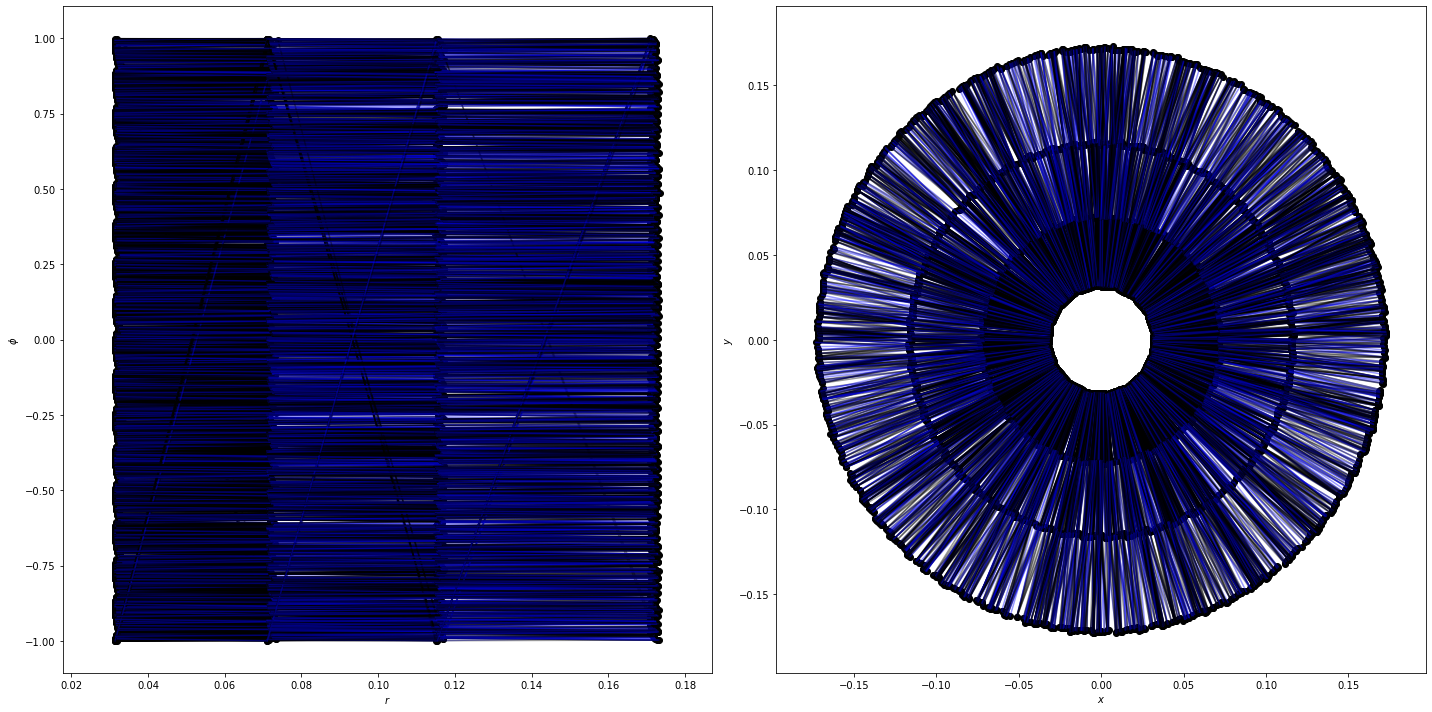

In [42]:
draw_sample(graph2.X, graph2.Ri, graph2.Ro, graph2.y, skip_false_edges=False)